In [2]:
library(fpp2)

Warning message:
"package 'fpp2' was built under R version 3.6.3"Registered S3 method overwritten by 'xts':
  method     from
  as.zoo.xts zoo 
Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 
-- Attaching packages ---------------------------------------------- fpp2 2.4 --
v ggplot2   3.3.3     v fma       2.4  
v forecast  8.13      v expsmooth 2.3  
Warning message:
"package 'ggplot2' was built under R version 3.6.3"Warning message:
"package 'forecast' was built under R version 3.6.3"Warning message:
"package 'fma' was built under R version 3.6.3"Warning message:
"package 'expsmooth' was built under R version 3.6.3"


# 1. Consider the `pigs` series— the number of pigs slaughtered in Victoria each month.

> a. Use the `ses` function in R to find the optimal values of $\alpha$ and $\ell_0$, and generate forecasts for the next four months.

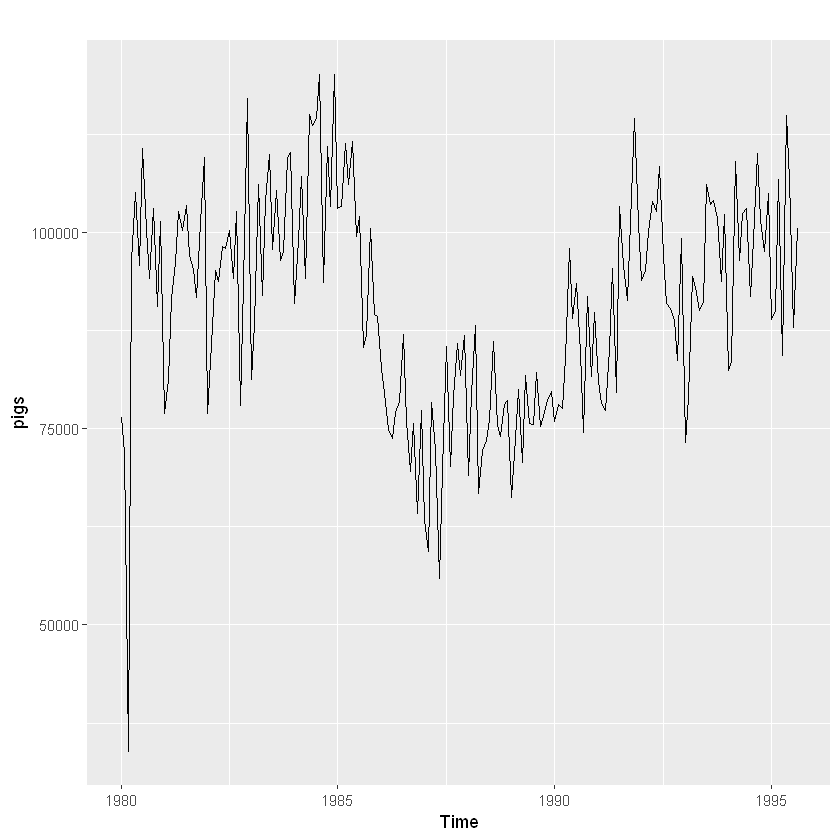

In [3]:
autoplot(pigs)

In [4]:
fc <- ses(pigs, h=4)

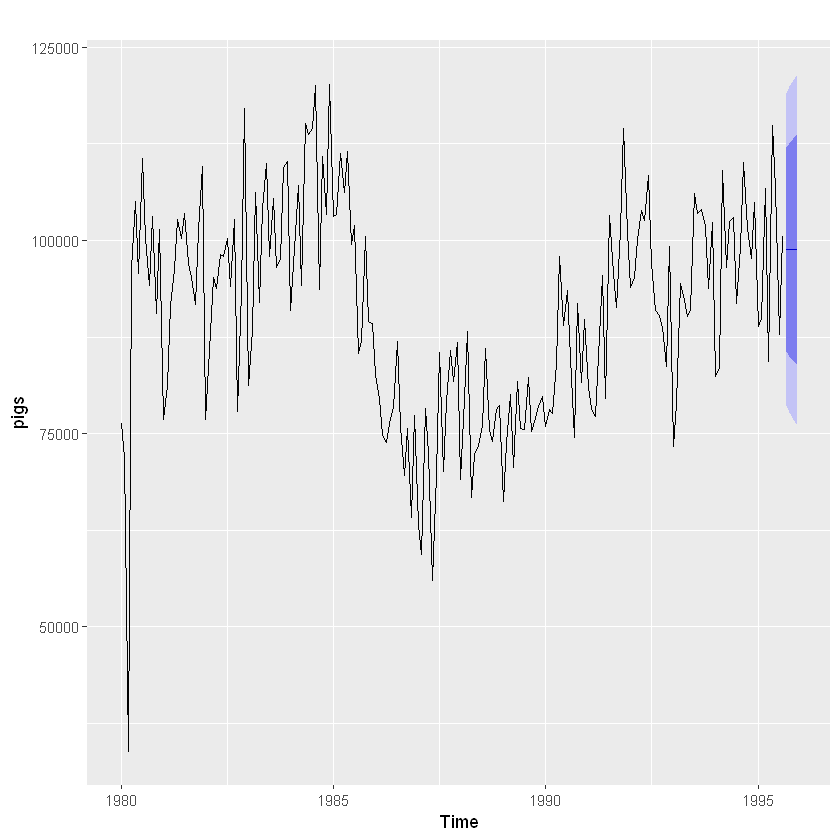

In [5]:
autoplot(pigs) + autolayer(fc)

In [6]:
fc

         Point Forecast    Lo 80    Hi 80    Lo 95    Hi 95
Sep 1995       98816.41 85605.43 112027.4 78611.97 119020.8
Oct 1995       98816.41 85034.52 112598.3 77738.83 119894.0
Nov 1995       98816.41 84486.34 113146.5 76900.46 120732.4
Dec 1995       98816.41 83958.37 113674.4 76092.99 121539.8

In [7]:
summary(fc)


Forecast method: Simple exponential smoothing

Model Information:
Simple exponential smoothing 

Call:
 ses(y = pigs, h = 4) 

  Smoothing parameters:
    alpha = 0.2971 

  Initial states:
    l = 77260.0561 

  sigma:  10308.58

     AIC     AICc      BIC 
4462.955 4463.086 4472.665 

Error measures:
                   ME    RMSE      MAE       MPE     MAPE      MASE       ACF1
Training set 385.8721 10253.6 7961.383 -0.922652 9.274016 0.7966249 0.01282239

Forecasts:
         Point Forecast    Lo 80    Hi 80    Lo 95    Hi 95
Sep 1995       98816.41 85605.43 112027.4 78611.97 119020.8
Oct 1995       98816.41 85034.52 112598.3 77738.83 119894.0
Nov 1995       98816.41 84486.34 113146.5 76900.46 120732.4
Dec 1995       98816.41 83958.37 113674.4 76092.99 121539.8


$\alpha = 0.2971 \\$ 
$\ell_0 = 77260.0561$

>  b. Compute a 95\% prediction interval for the first forecast using $\hat{y} \pm 1.96s$ where $s$ is the standard deviation of the residuals. Compare your interval with the interval produced by R.

In [8]:
s <- sqrt(var(fc$residuals))
m <- fc$mean[1]
c(lb = m - 1.96 * s, ub = m + 1.96 * s)

lb        ub 
 78679.97 118952.84

In [9]:
s1 <- sqrt(sum(fc$residuals ^ 2) / (length(pigs) - 2))
c(lb = m - 1.96 * s1, ub = m + 1.96 * s1)

lb       ub 
 78611.6 119021.2

# 2. Write your own function to implement simple exponential smoothing. The function should take arguments `y` (the time series), `alpha` (the smoothing parameter $\alpha$) and `level` (the initial level $\ell_0$). It should return the forecast of the next observation in the series. Does it give the same forecast as `ses`?

In [10]:
fses <- function(y, alpha, level){
    n <- length(y)
    yt <- numeric(n + 1)
    yt[1] <- level
    for (i in 2:(n + 1)){
        yt[i] <- alpha * y[i - 1] + (1 - alpha) * yt[i - 1]
    }
    return(yt[n + 1])
}

In [11]:
fc$model$par

alpha            l 
2.971488e-01 7.726006e+04

In [12]:
fc$mean[1]

[1] 98816.41

In [13]:
fses(pigs, 0.297148833372095, 77260.0561458528)

[1] 98816.41

# 3. Modify your function from the previous exercise to return the sum of squared errors rather than the forecast of the next observation. Then use the `optim` function to find the optimal values of $\alpha$ and $\ell_0$. Do you get the same values as the `ses` function?

In [14]:
fses_se <- function(par, y){
    alpha <- par[1]
    level <- par[2]
    n <- length(y)
    yt <- numeric(n)
    yt[1] <- level
    for (i in 2:n){
        yt[i] <- alpha * y[i - 1] + (1 - alpha) * yt[i - 1]
    }
    return(sum((y - yt) ^2))
}

In [15]:
fc$model$par

alpha            l 
2.971488e-01 7.726006e+04

In [16]:
optim(c(0.1, pigs[1]), fses_se, y=pigs)$par

[1]     0.297119 77265.874781

In [17]:
fses(pigs, 0.297118970754748, 77265.8747808378)

[1] 98816.44

# 4. Combine your previous two functions to produce a function which both finds the optimal values of $\alpha$ and $\ell_0$, and produces a forecast of the next observation in the series.

In [18]:
fses1 <- function(y, h=4){
    par <- optim(c(0.1, y[1]), fses_se, y=y)$par
    alpha <- par[1]
    level <- par[2]
    n <- length(y)
    yt <- numeric(n + 1)
    yt[1] <- level
    for (i in 2:(n + 1)){
        yt[i] <- alpha * y[i - 1] + (1 - alpha) * yt[i - 1]
    }
    return(rep(yt[n + 1], h))
}

In [19]:
fses1(pigs, h=4)

[1] 98816.44 98816.44 98816.44 98816.44

In [20]:
ses(pigs, h=4)

         Point Forecast    Lo 80    Hi 80    Lo 95    Hi 95
Sep 1995       98816.41 85605.43 112027.4 78611.97 119020.8
Oct 1995       98816.41 85034.52 112598.3 77738.83 119894.0
Nov 1995       98816.41 84486.34 113146.5 76900.46 120732.4
Dec 1995       98816.41 83958.37 113674.4 76092.99 121539.8

# 5. Data set `books` contains the daily sales of paperback and hardcover books at the same store. The task is to forecast the next four days’ sales for paperback and hardcover books.

>    a. Plot the series and discuss the main features of the data.

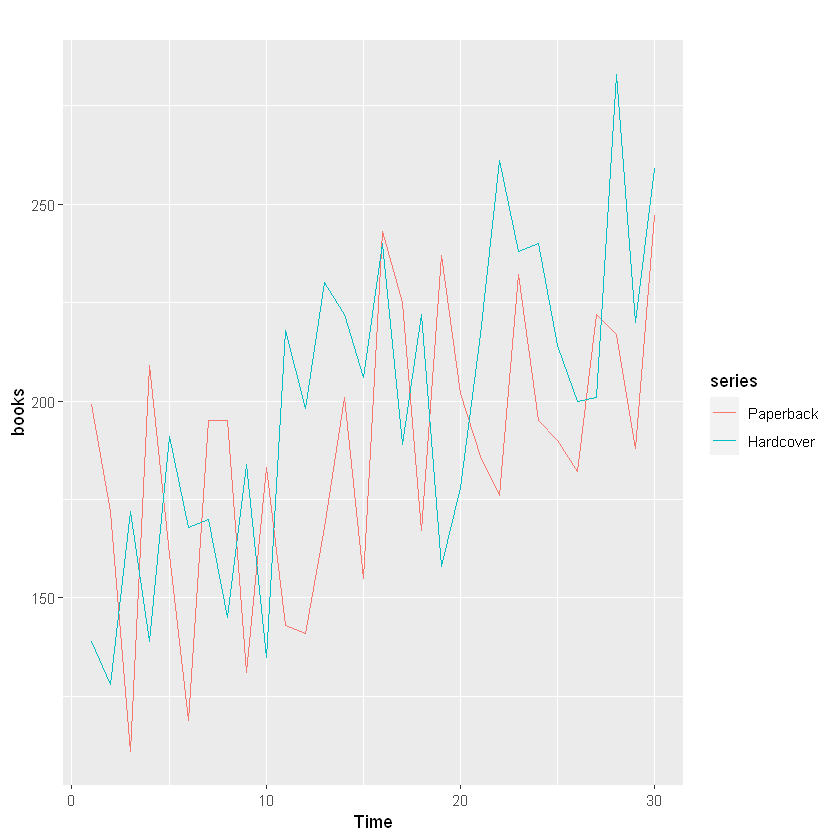

In [21]:
autoplot(books)

>    b. Use the `ses()` function to forecast each series, and plot the forecasts.

In [22]:
fchd <- ses(books[,"Hardcover"], h=4)
fcpb <- ses(books[,"Paperback"], h=4)

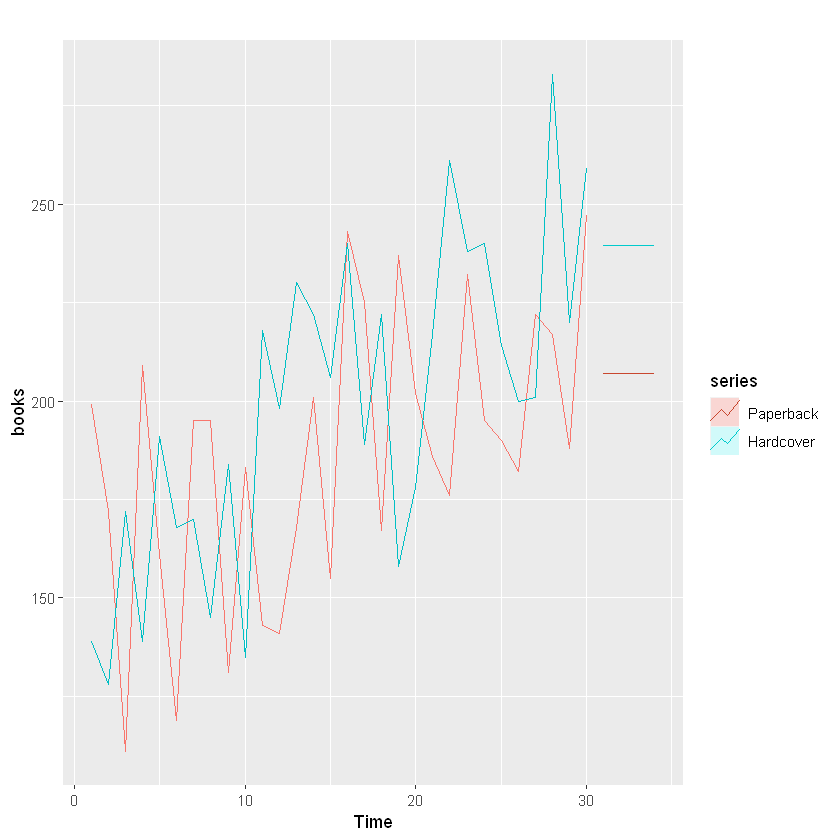

In [23]:
autoplot(books) + 
autolayer(fchd, series = "Hardcover", PI=FALSE) +
autolayer(fcpb, series = "Paperback", PI=FALSE)

> c. Compute the RMSE values for the training data in each case.

In [24]:
round(accuracy(fchd),2)
round(accuracy(fcpb),2)

,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1
Training set,9.17,31.93,26.77,2.64,13.39,0.8,-0.14


,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1
Training set,7.18,33.64,27.84,0.47,15.58,0.7,-0.21


# 6.

> a. Now apply Holt’s linear method to the `paperback` and `hardback` series and compute four-day forecasts in each case.

In [25]:
hh <- holt(books[,"Hardcover"], h=4)
hp <- holt(books[,"Paperback"], h=4)

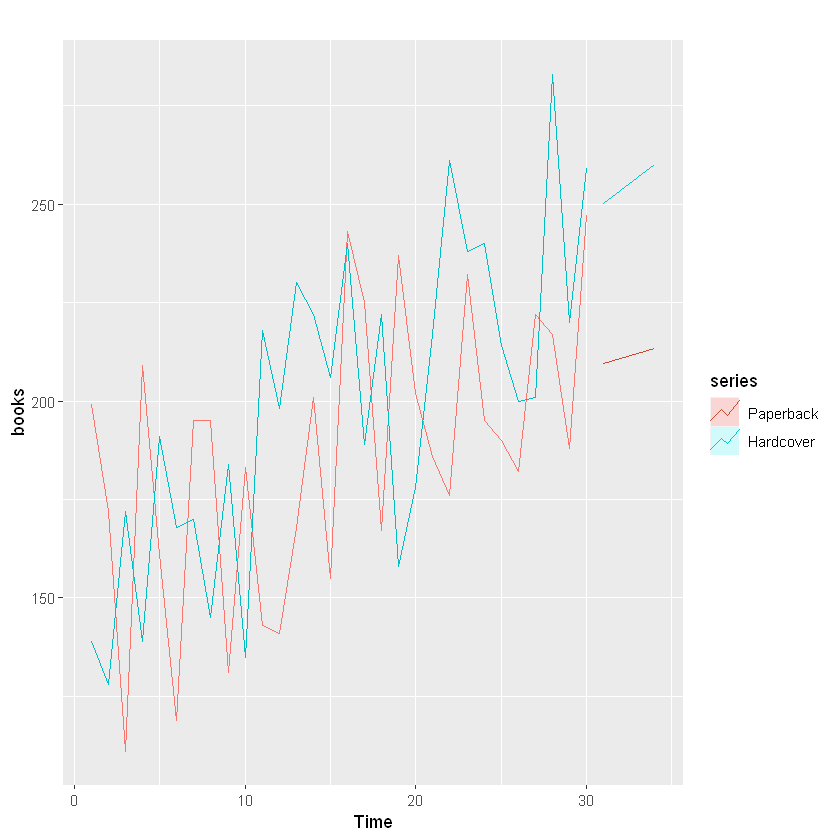

In [26]:
autoplot(books) + 
autolayer(hh, series = "Hardcover", PI=FALSE) +
autolayer(hp, series = "Paperback", PI=FALSE)

>    b. Compare the RMSE measures of Holt’s method for the two series to those of simple exponential smoothing in the previous question. (Remember that Holt’s method is using one more parameter than SES.) Discuss the merits of the two forecasting methods for these data sets.

In [27]:
round(accuracy(hh),2)
round(accuracy(hp),2)

,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1
Training set,-0.14,27.19,23.16,-2.11,12.16,0.69,-0.03


,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1
Training set,-3.72,31.14,26.18,-5.51,15.58,0.66,-0.18


>    c. Compare the forecasts for the two series using both methods. Which do you think is best?

Так как для обоих рядов имеет место тренд, поэтому RMSE для метода Холта меньше.

>    d. Calculate a 95% prediction interval for the first forecast for each series, using the RMSE values and assuming normal errors. Compare your intervals with those produced using `ses` and `holt`.

In [28]:
shd <- sqrt(fchd$model$mse)
mhd <- fchd$mean[1]
c(lb = mhd - 1.96 * shd, ub = mhd + 1.96 * shd)

lb       ub 
176.9753 302.1449

In [29]:
spb <- sqrt(fcpb$model$mse)
mpb <- fcpb$mean[1]
c(lb = mpb - 1.96 * spb, ub = mpb + 1.96 * spb)

lb       ub 
141.1798 273.0395

In [30]:
shh <- sqrt(hh$model$mse)
mhh <- hh$mean[1]
c(lb = mhh - 1.96 * shh, ub = mhh + 1.96 * shh)

lb       ub 
196.8745 303.4733

In [31]:
shp <- sqrt(hp$model$mse)
mhp <- hp$mean[1]
c(lb = mhp - 1.96 * shp, ub = mhp + 1.96 * shp)

lb       ub 
148.4384 270.4951

# 7. For this exercise, use data set `eggs`, the price of a dozen eggs in the United States from 1900–1993. Experiment with the various options in the `holt()` function to see how much the forecasts change with damped trend, or  with a Box-Cox transformation. Try to develop an intuition of what each argument is doing to the forecasts. 
## [Hint: use `h=100` when calling `holt()` so you can clearly see the differences between the various options when plotting the forecasts.] 
## Which model gives the best RMSE?

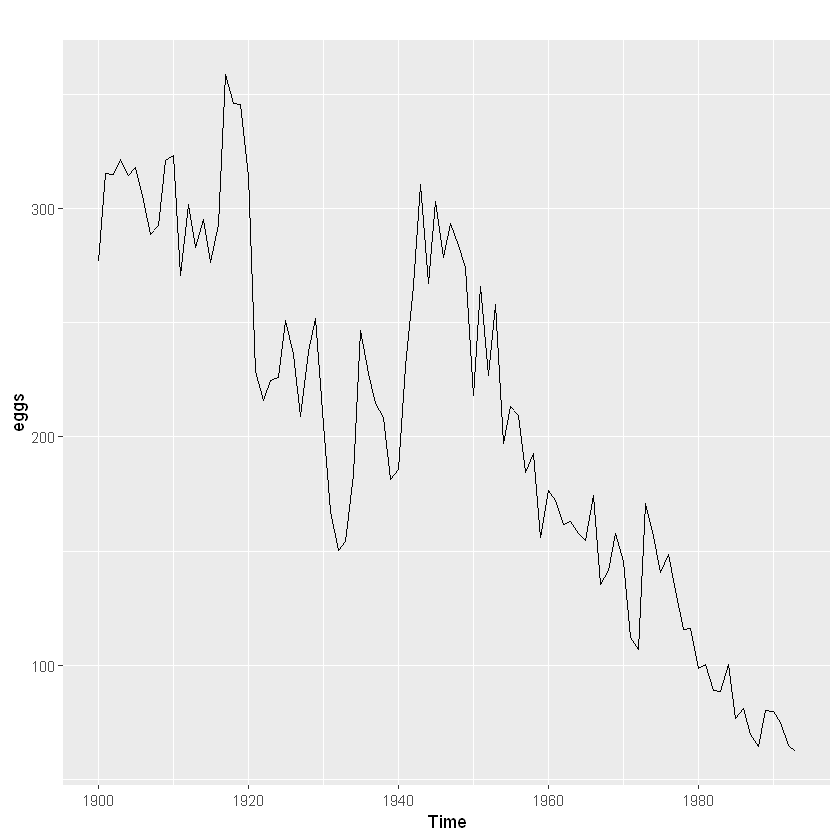

In [32]:
autoplot(eggs)

In [33]:
fe1 <- holt(eggs, h=100)

In [34]:
accuracy(fe1)

,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1
Training set,0.04499087,26.58219,19.18491,-1.142201,9.653791,0.9463626,0.01348202


In [35]:
fe2 <- holt(eggs, h=100, damped = TRUE)

In [36]:
accuracy(fe2)

,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1
Training set,-2.891496,26.54019,19.2795,-2.907633,10.01894,0.9510287,-0.003195358


In [37]:
fe2$model$par

alpha         beta          phi            l            b 
8.462119e-01 4.016302e-03 8.000000e-01 2.769842e+02 4.996579e+00

In [38]:
fe3 <- holt(eggs, h=100, alpha=0.5, beta=0.5, damped = TRUE)
accuracy(fe3)

,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1
Training set,-1.359818,31.06105,23.2205,-1.566944,11.79842,1.145432,0.1565599


In [39]:
fe4 <- holt(eggs, h=100, alpha=0.5, beta=0.1, damped = TRUE)
accuracy(fe4)

,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1
Training set,-3.015718,28.28655,20.47675,-3.01732,10.63521,1.010088,0.2643378


In [40]:
fe5 <- holt(eggs, h=100, alpha=0.5, beta=0.05, damped = TRUE)
accuracy(fe5)

,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1
Training set,-3.722539,28.03246,20.41912,-3.611935,10.73974,1.007245,0.280374


In [41]:
fe6 <- holt(eggs, h=100, alpha=0.9, beta=0.001, damped = TRUE)
accuracy(fe6)

,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1
Training set,-3.405292,26.52701,19.64428,-2.9945,10.14573,0.9690229,-0.05782288


In [42]:
fe7 <- holt(eggs, h=100, alpha=0.9, beta=0.0001, damped = TRUE)
accuracy(fe7)

,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1
Training set,-3.352562,26.51669,19.59936,-2.981654,10.13096,0.9668069,-0.05646822


In [43]:
fe8 <- holt(eggs, h=100, alpha=0.9, beta=0.0001, phi=0.8, damped = TRUE)
accuracy(fe8)

,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1
Training set,-3.208492,26.51226,19.52392,-2.933841,10.10505,0.9630854,-0.05510603


In [44]:
fe9 <- holt(eggs, h=100, alpha=0.9, beta=0.0001, damped = FALSE)
accuracy(fe9)

,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1
Training set,-0.006124764,26.46502,19.3541,-1.181171,9.807844,0.9547087,-0.05226493


In [45]:
fe10 <- holt(eggs, h=100, alpha=0.9, beta=0.0001, damped = FALSE, lambda=0.2)
accuracy(fe10)

,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1
Training set,0.8589922,26.39539,19.29629,-0.9689305,9.789108,0.951857,-0.04817418


In [46]:
fe11 <- holt(eggs, h=100, alpha=0.9, beta=0.0001, damped = FALSE, lambda=0.01)
accuracy(fe11)

,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1
Training set,1.20373,26.38563,19.28933,-0.8511079,9.779588,0.9515139,-0.04609538


In [47]:
fe12 <- holt(eggs, h=100, alpha=0.9, beta=0.0001, damped = TRUE, lambda=0.8)
accuracy(fe12)

,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1
Training set,-3.185132,26.51349,19.52612,-2.919051,10.10338,0.9631941,-0.05508185


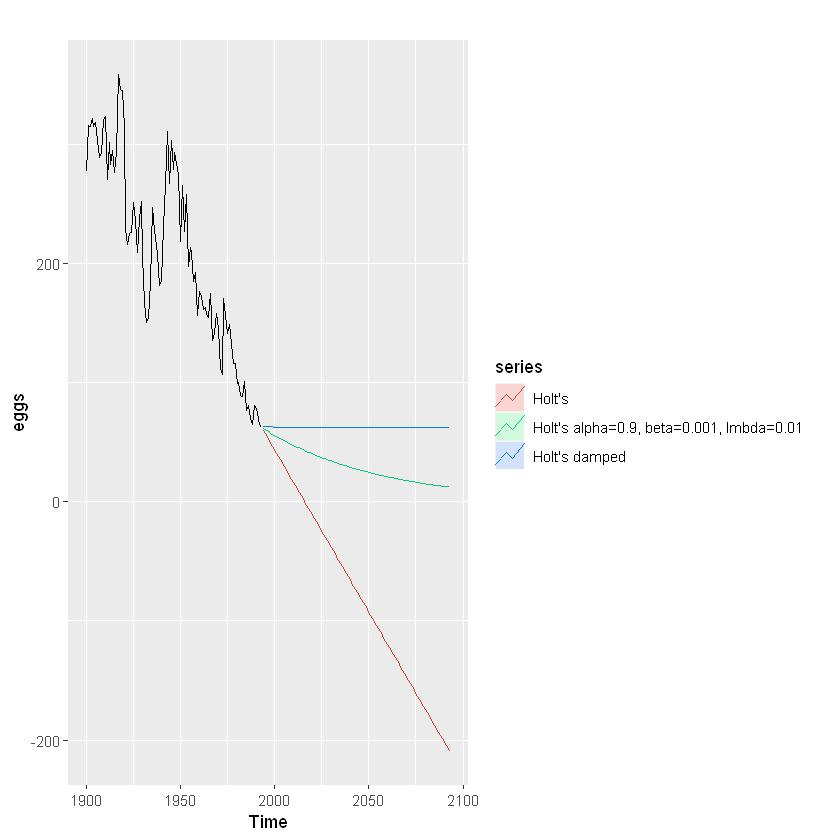

In [48]:
autoplot(eggs) +
autolayer(fe1, series = "Holt's", PI=FALSE) +
autolayer(fe2, series = "Holt's damped", PI=FALSE) +
autolayer(fe11, series = "Holt's alpha=0.9, beta=0.001, lmbda=0.01", PI=FALSE)

# 8. Recall your retail time series data (from Exercise 3 in Section 2.10).

>  a. Why is multiplicative seasonality necessary for this series?

In [49]:
retaildata<-readxl::read_excel("retail.xlsx", skip=1)

In [50]:
myts <- ts(retaildata[,"A3349873A"],
  frequency=12, start=c(1982,4))

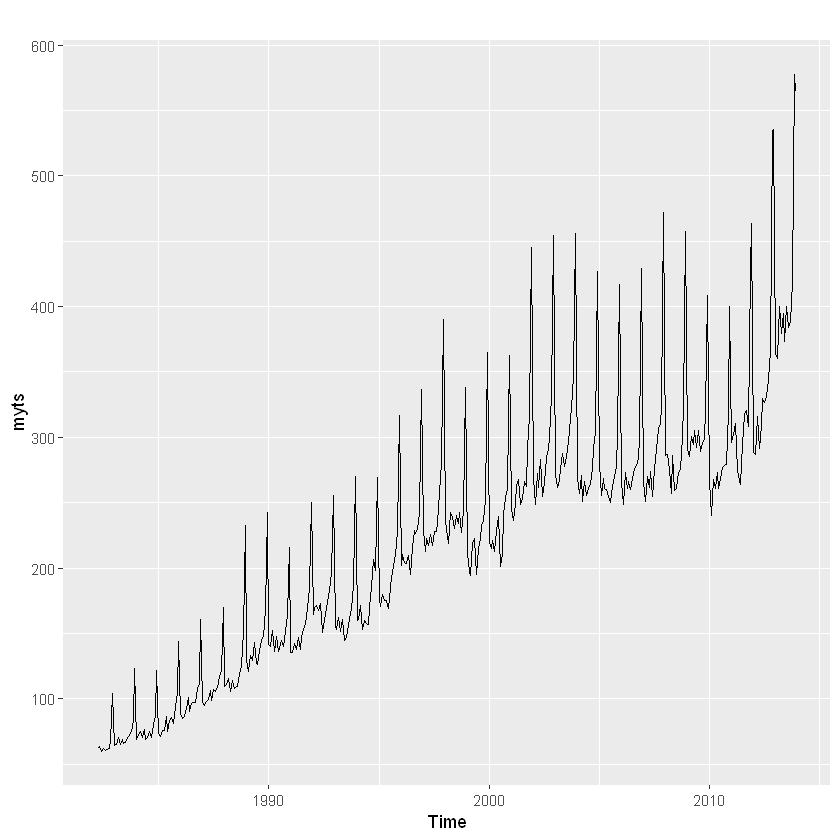

In [51]:
autoplot(myts)

Сезонные колебания увеличиваются пропорцианально уровню ряда.

>  b. Apply Holt-Winters’ multiplicative method to the data. Experiment with making the trend damped.

In [52]:
hw1 <- hw(myts, seasonal = 'multiplicative', damped=FALSE)
hw2 <- hw(myts, seasonal = 'multiplicative', damped=TRUE)

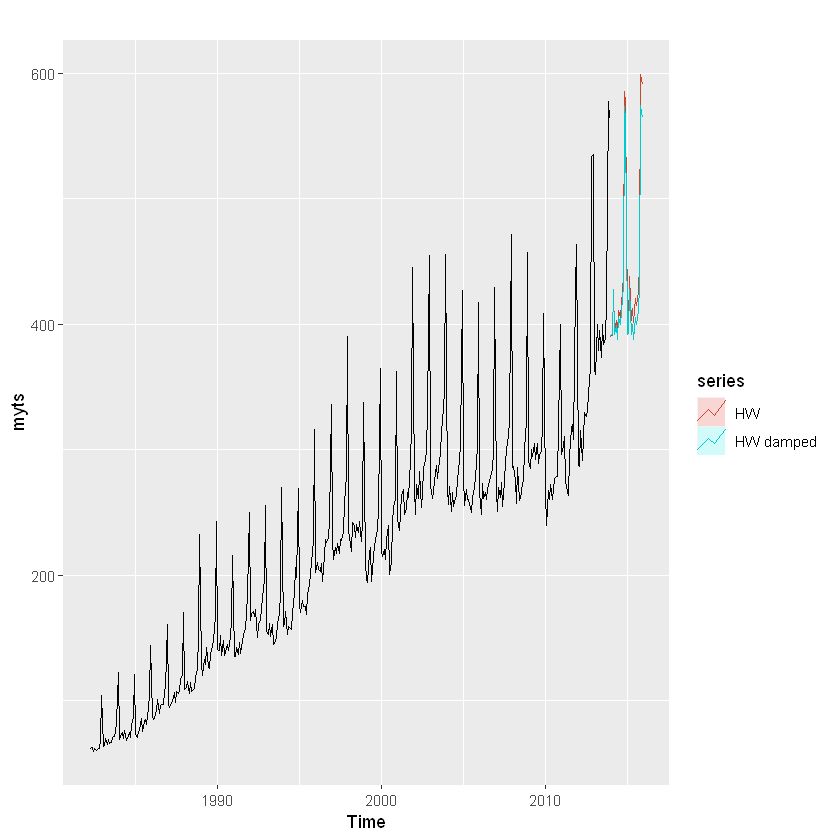

In [53]:
autoplot(myts) +
autolayer(hw1, series="HW", PI=FALSE) +
autolayer(hw2, series="HW damped", PI=FALSE)

>  c. Compare the RMSE of the one-step forecasts from the two methods. Which do you prefer?

In [54]:
accuracy(hw1)
accuracy(hw2)

,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1
Training set,0.1170648,13.29378,8.991856,-0.1217735,3.918351,0.4748948,0.08635577


,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1
Training set,1.414869,13.30494,9.042151,0.6105987,3.959617,0.4775511,0.04077895


>  d. Check that the residuals from the best method look like white noise.


	Ljung-Box test

data:  Residuals from Holt-Winters' multiplicative method
Q* = 40.405, df = 8, p-value = 2.692e-06

Model df: 16.   Total lags used: 24



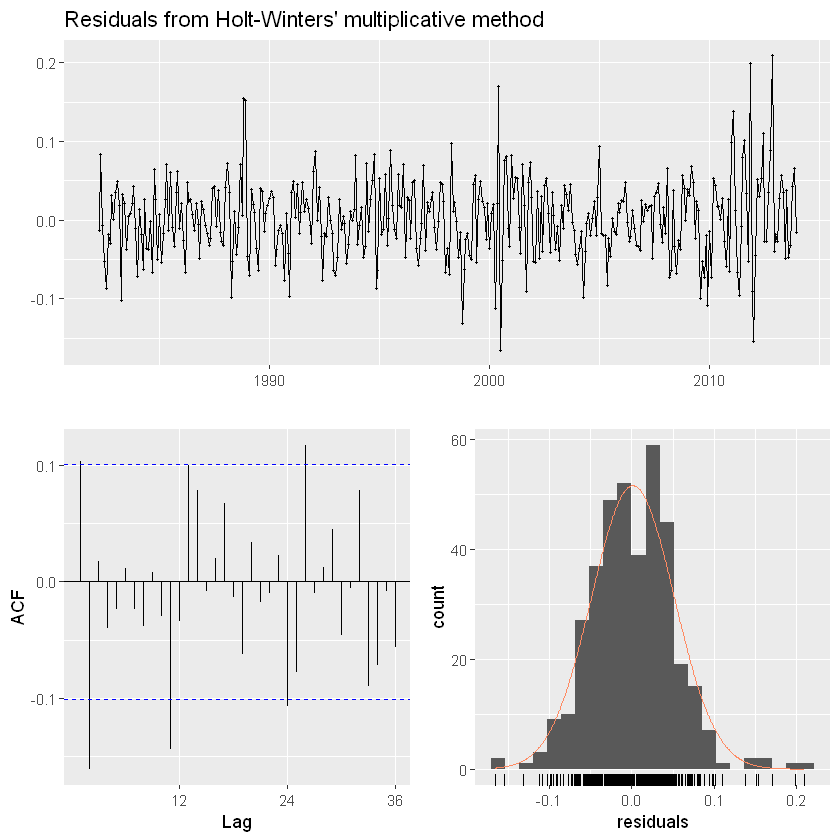

In [55]:
checkresiduals(hw1)

>  e. Now find the test set RMSE, while training the model to the end of 2010. Can you beat the seasonal naïve approach from Exercise 8 in Section 3.7)?

In [56]:
ts_train <- window(myts, end=c(2010, 12))

In [57]:
hw3 <- hw(ts_train, h=36, seasonal = 'multiplicative', damped=FALSE)
fcn <- snaive(ts_train, h=36)

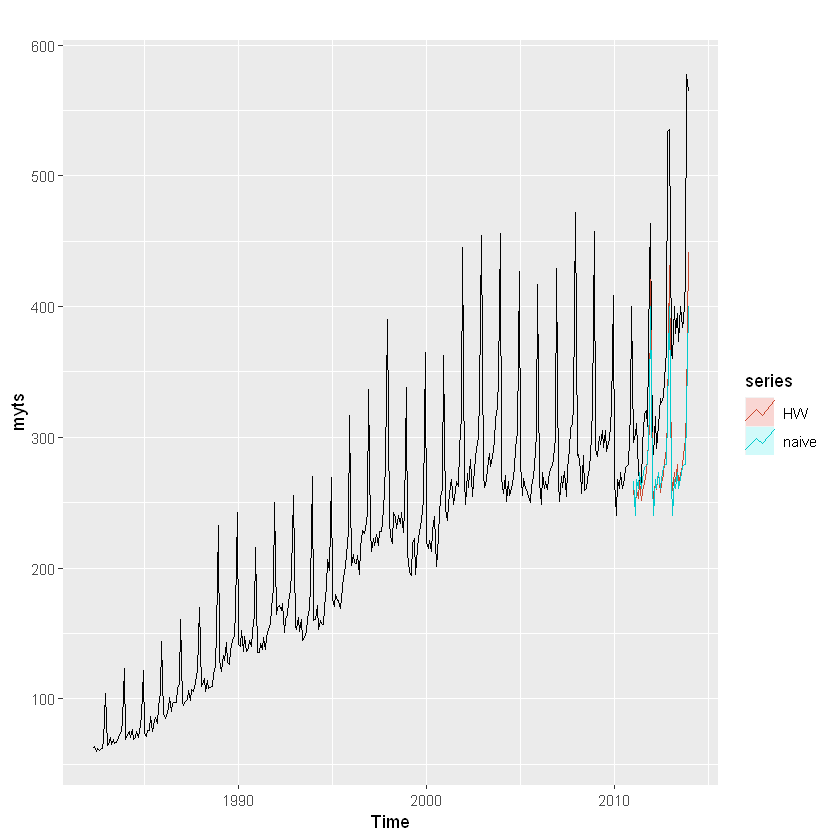

In [58]:
autoplot(myts) +
autolayer(hw3, series="HW", PI=FALSE) +
autolayer(fcn, series="naive", PI=FALSE)

In [59]:
test <- window(myts, start=c(2011,1))

In [60]:
sum(sqrt((test - hw3$mean)^2)) / length(test)
sum(sqrt((test - fcn$mean)^2)) / length(test)

[1] 78.34068

[1] 82.06667

# 9. For the same retail data, try an STL decomposition applied to the Box-Cox transformed series, followed by ETS on the seasonally adjusted data. How does that compare with your best previous forecasts on the test set?

In [61]:
train <- ts(as.vector(myts), start=c(1982,4), end=c(2010,12), frequency = 12)
lambda <- BoxCox.lambda(train)
lambda

[1] 0.1979682

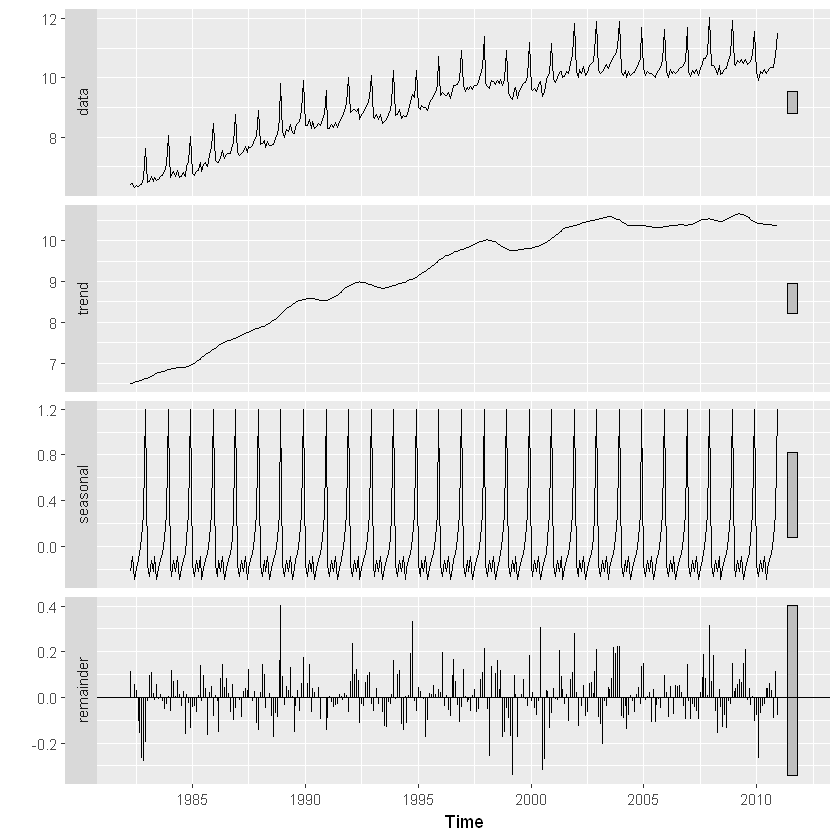

In [62]:
bc <- BoxCox(train, lambda)
bcstl <- stl(bc, s.window='periodic', robust=TRUE)
autoplot(bcstl)

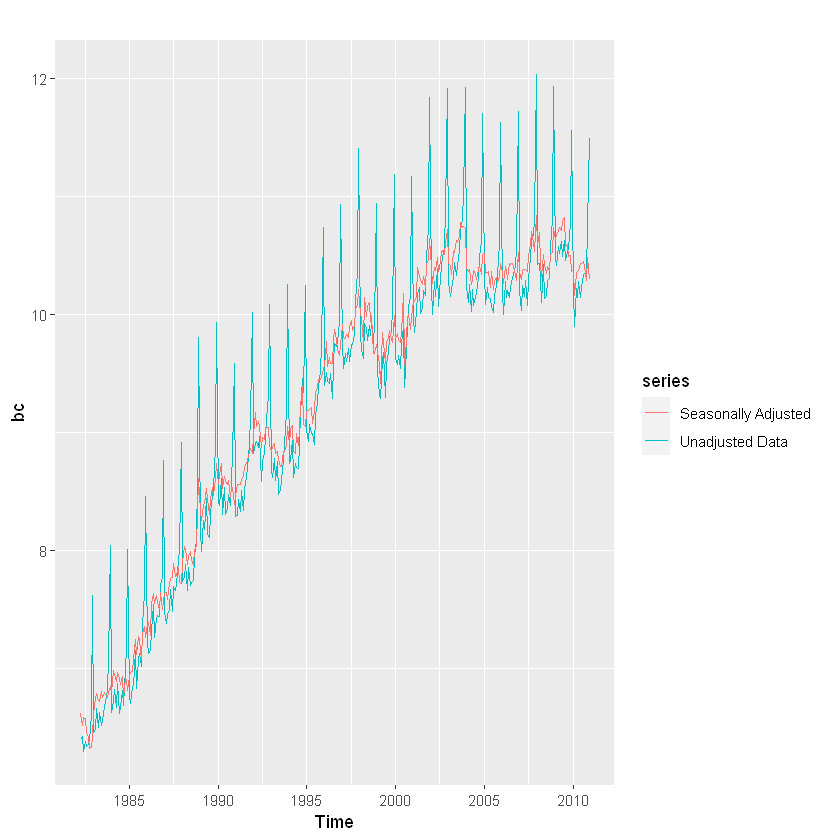

In [63]:
bcsadj <- bc - bcstl$time.series[,'seasonal']

autoplot(bc, series='Unadjusted Data') +
  autolayer(bcsadj, series='Seasonally Adjusted')

In [64]:
fets <- ets(bcsadj)
summary(fets)

ETS(M,A,N) 

Call:
 ets(y = bcsadj) 

  Smoothing parameters:
    alpha = 0.6333 
    beta  = 1e-04 

  Initial states:
    l = 6.567 
    b = 0.0134 

  sigma:  0.0129

     AIC     AICc      BIC 
543.5141 543.6911 562.7319 

Training set error measures:
                       ME      RMSE       MAE         MPE      MAPE      MASE
Training set -0.003878286 0.1172707 0.0899321 -0.03866332 0.9882063 0.3832231
                   ACF1
Training set 0.01864534


In [65]:
fcets <- forecast(fets, h=36)$mean
fcets <- InvBoxCox(fcets, lambda=lambda)
fcets

ERROR while rich displaying an object: Error in repr_matrix_generic(obj, "\n%s%s\n", sprintf("|%%s\n|%s|\n", : formal argument "cols" matched by multiple actual arguments

Traceback:
1. FUN(X[[i]], ...)
2. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
3. tryCatchList(expr, classes, parentenv, handlers)
4. tryCatchOne(expr, names, parentenv, handlers[[1L]])
5. doTryCatch(return(expr), name, parentenv, handler)
6. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = erro

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
2011,280.4265,281.6456,282.8690,284.0966,285.3286,286.5648,287.8053,289.0500,290.2992,291.5526,292.8104,294.0725
2012,295.3390,296.6098,297.8850,299.1647,300.4487,301.7371,303.0300,304.3273,305.6291,306.9353,308.2460,309.5612
2013,310.8809,312.2051,313.5338,314.8670,316.2048,317.5472,318.8941,320.2456,321.6016,322.9623,324.3276,325.6975


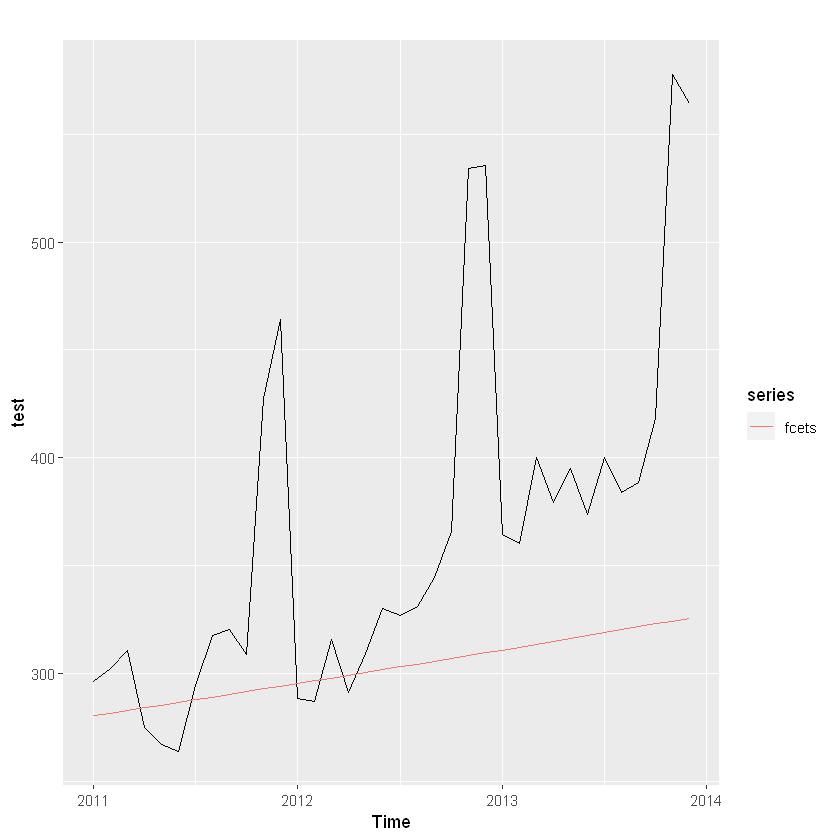

In [66]:
autoplot(test) + 
autolayer(fcets)

In [67]:
sum(sqrt((test - fcets)^2)) / length(test)

[1] 65.80014

# 10. For this exercise, use the quarterly UK passenger vehicle production data from 1977Q1--2005Q1 (data set `ukcars`).

>a. Plot the data and describe the main features of the series.

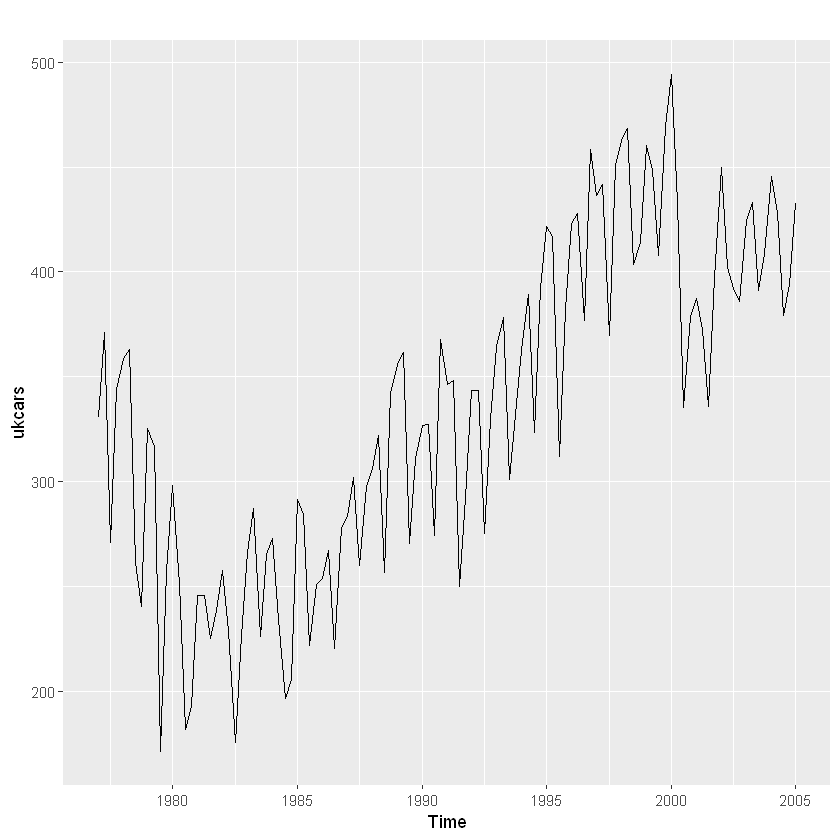

In [68]:
autoplot(ukcars)

>b. Decompose the series using STL and obtain the seasonally adjusted data.

In [69]:
ukstl <- stl(ukcars, s.window = "periodic")

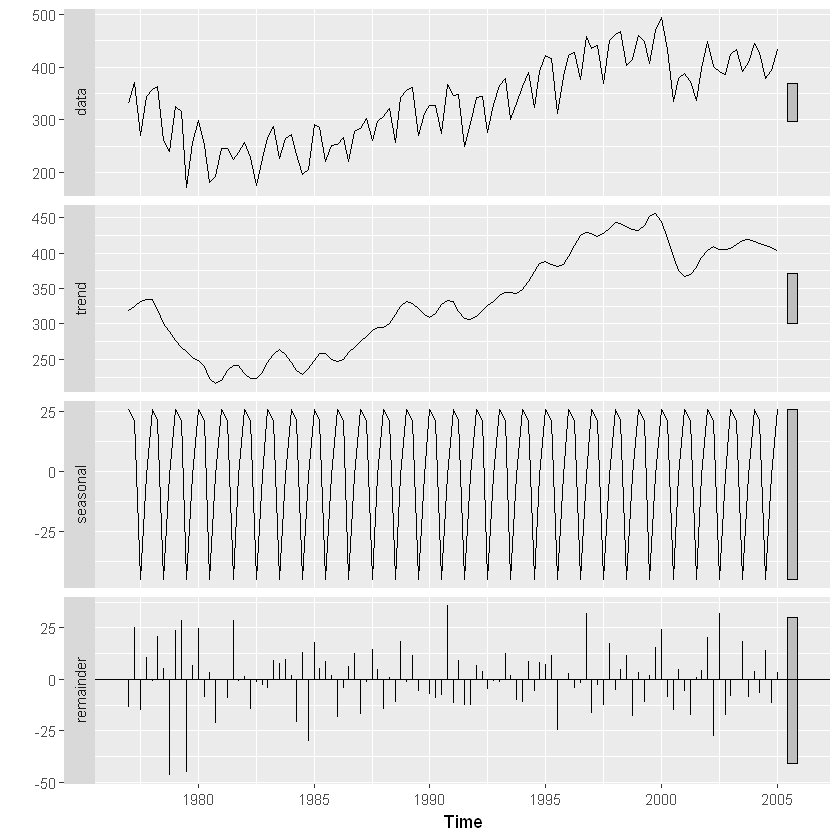

In [70]:
autoplot(ukstl)

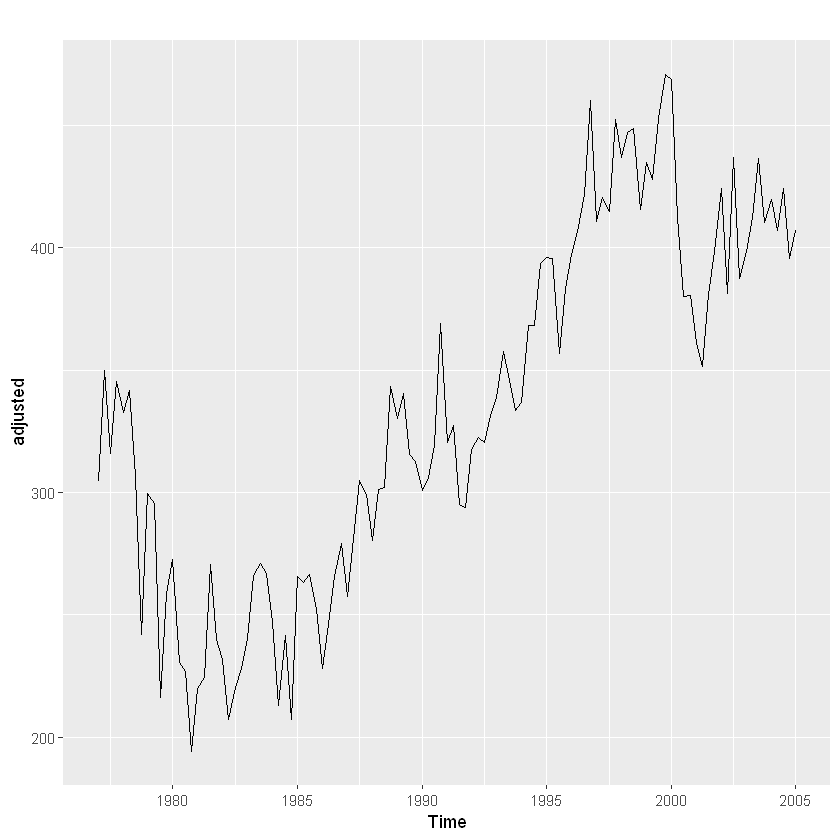

In [71]:
adjusted <- seasadj(ukstl)
autoplot(adjusted)

>c. Forecast the next two years of the series using an additive damped trend method applied to the seasonally adjusted data. (This can be done in one step using `stlf` with arguments `etsmodel="AAN", damped=TRUE`.)

In [72]:
fcst_damped <- stlf(ukcars, etsmodel="AAN", damped=TRUE)

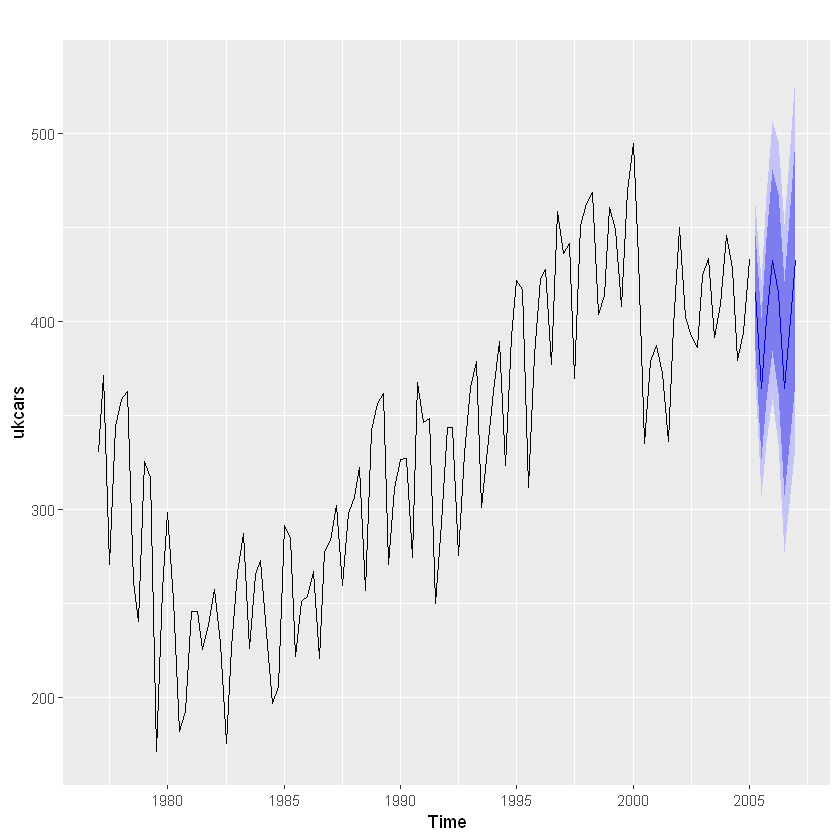

In [73]:
autoplot(ukcars) + 
autolayer(fcst_damped)

In [74]:
fcst_damped

        Point Forecast    Lo 80    Hi 80    Lo 95    Hi 95
2005 Q2       415.0289 384.4576 445.6001 368.2742 461.7836
2005 Q3       364.2543 326.8700 401.6386 307.0799 421.4287
2005 Q4       400.8059 357.6702 443.9416 334.8355 466.7762
2006 Q1       432.5663 384.3596 480.7731 358.8404 506.2922
2006 Q2       415.0250 362.2312 467.8189 334.2838 495.7663
2006 Q3       364.2507 307.2369 421.2646 277.0556 451.4459
2006 Q4       400.8026 339.8596 461.7456 307.5983 494.0069
2007 Q1       432.5633 367.9289 497.1976 333.7136 531.4130

>d. Forecast the next two years of the series using Holt’s linear method applied to the seasonally adjusted data (as before but with `damped=FALSE`).

In [75]:
fcst <- stlf(ukcars, etsmodel="AAN", damped=FALSE)

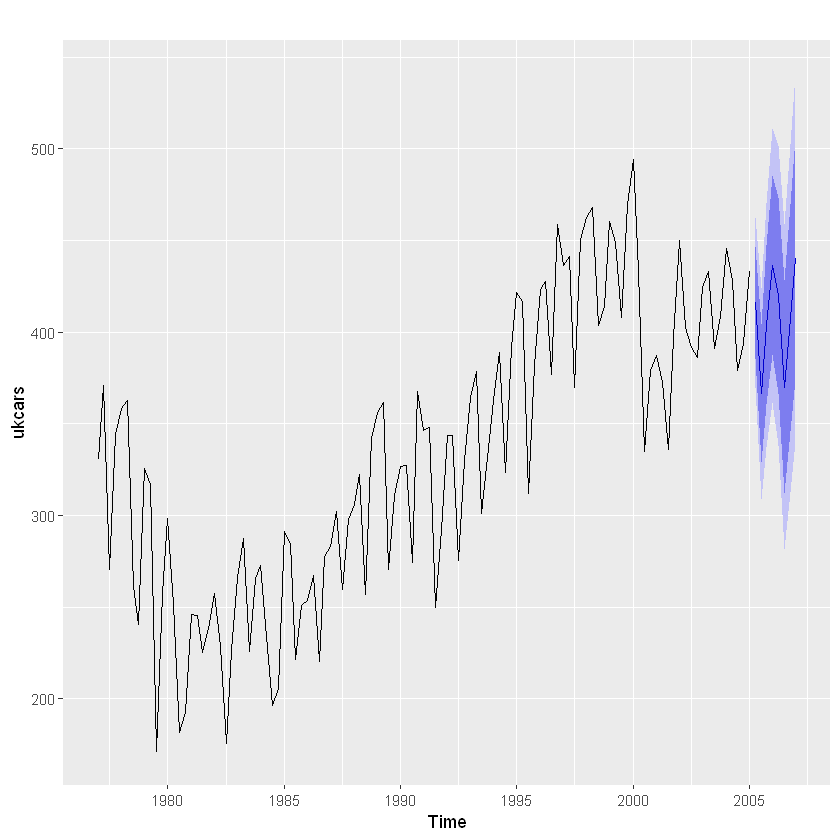

In [76]:
autoplot(ukcars) + 
autolayer(fcst)

In [77]:
fcst

        Point Forecast    Lo 80    Hi 80    Lo 95    Hi 95
2005 Q2       416.1915 385.7950 446.5881 369.7040 462.6791
2005 Q3       366.3343 328.7907 403.8780 308.9163 423.7524
2005 Q4       403.8032 360.2690 447.3375 337.2233 470.3831
2006 Q1       436.4809 387.6847 485.2771 361.8535 511.1083
2006 Q2       419.8568 366.3120 473.4016 337.9671 501.7465
2006 Q3       369.9996 312.0932 427.9060 281.4394 458.5598
2006 Q4       407.4685 345.5056 469.4313 312.7045 502.2325
2007 Q1       440.1461 374.3755 505.9167 339.5587 540.7336

>e. Now use `ets()` to choose a seasonal model for the data.

In [78]:
ukets <- ets(ukcars)

In [79]:
ukets

ETS(A,N,A) 

Call:
 ets(y = ukcars) 

  Smoothing parameters:
    alpha = 0.6199 
    gamma = 1e-04 

  Initial states:
    l = 314.2568 
    s = -1.7579 -44.9601 21.1956 25.5223

  sigma:  25.9302

     AIC     AICc      BIC 
1277.752 1278.819 1296.844 

>f. Compare the RMSE of the ETS model with the RMSE of the models you obtained using  STL decompositions.  Which gives the better in-sample fits?

In [80]:
accuracy(fcst_damped)
accuracy(fcst)
accuracy(ukets)

,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1
Training set,1.551267,23.32113,18.48987,0.04121971,6.042764,0.602576,0.02262668


,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1
Training set,-0.3412727,23.295,18.1605,-0.5970778,5.98018,0.5918418,0.02103582


,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1
Training set,1.313884,25.23244,20.17907,-0.1570979,6.629003,0.6576259,0.02573334


>g. Compare the forecasts from the three approaches? Which seems most reasonable?

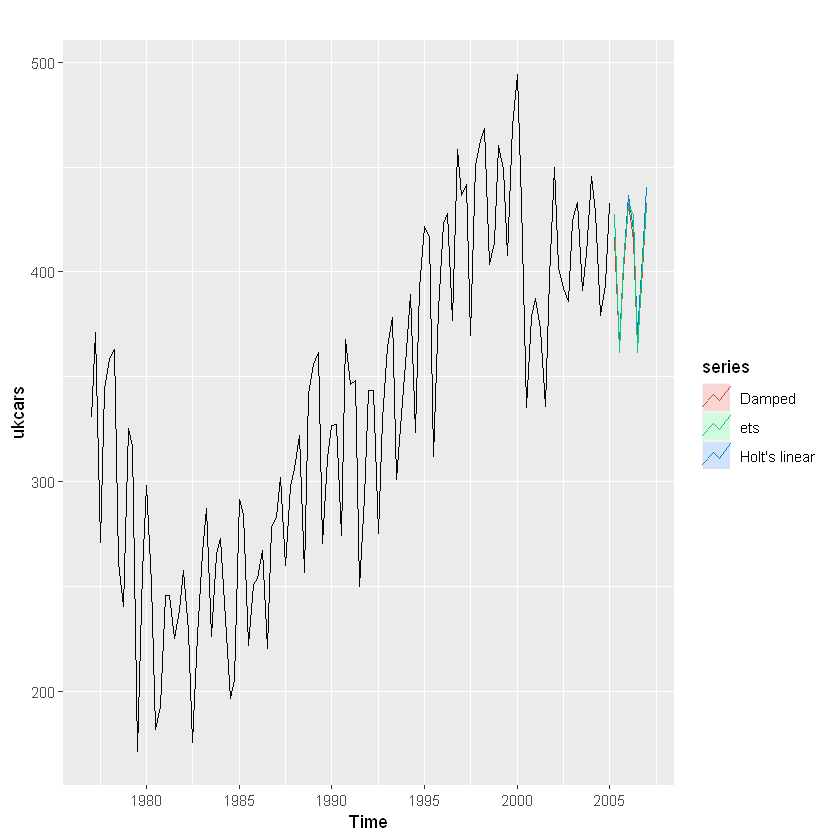

In [81]:
autoplot(ukcars) + 
autolayer(fcst, PI=FALSE, series="Holt's linear") +
autolayer(fcst_damped, PI=FALSE, series="Damped") + 
autolayer(forecast(ukets), PI=FALSE, series="ets")

>h. Check the residuals of your preferred model.

Warning message in checkresiduals(fcst):
"The fitted degrees of freedom is based on the model used for the seasonally adjusted data."


	Ljung-Box test

data:  Residuals from STL +  ETS(A,A,N)
Q* = 22.061, df = 4, p-value = 0.0001949

Model df: 4.   Total lags used: 8



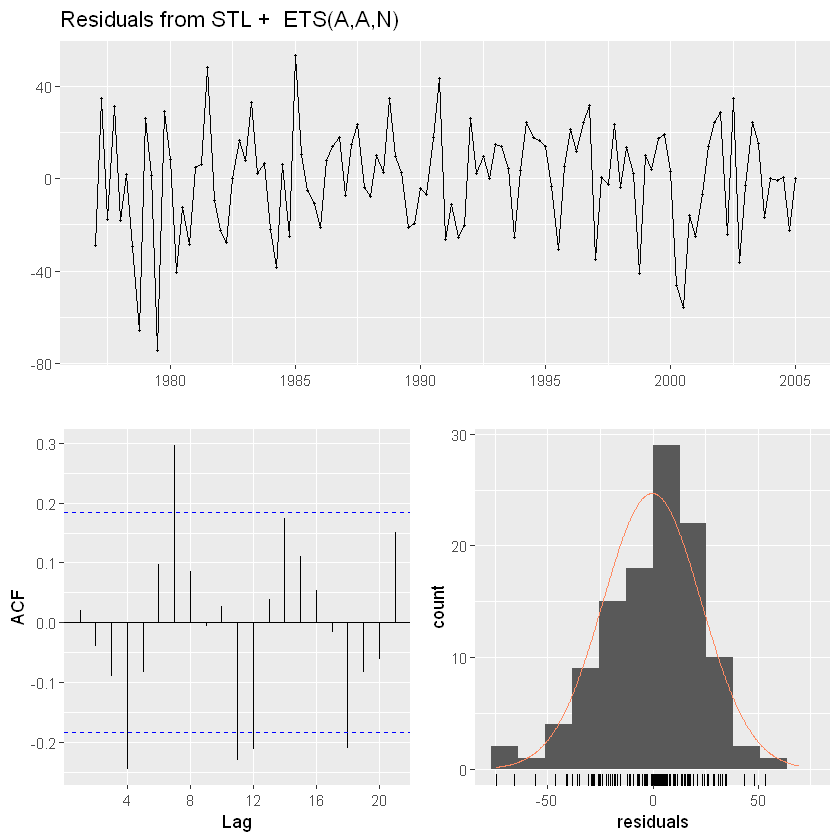

In [82]:
checkresiduals(fcst)

Warning message in checkresiduals(fcst_damped):
"The fitted degrees of freedom is based on the model used for the seasonally adjusted data."


	Ljung-Box test

data:  Residuals from STL +  ETS(A,Ad,N)
Q* = 24.138, df = 3, p-value = 2.337e-05

Model df: 5.   Total lags used: 8



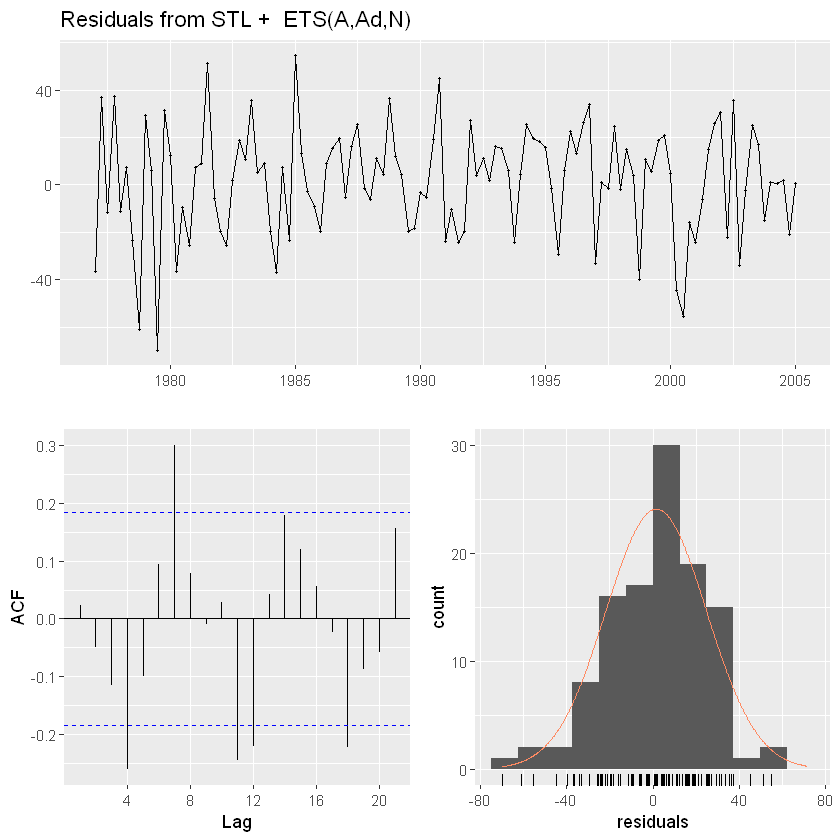

In [83]:
checkresiduals(fcst_damped)


	Ljung-Box test

data:  Residuals from ETS(A,N,A)
Q* = 18.324, df = 3, p-value = 0.0003772

Model df: 6.   Total lags used: 9



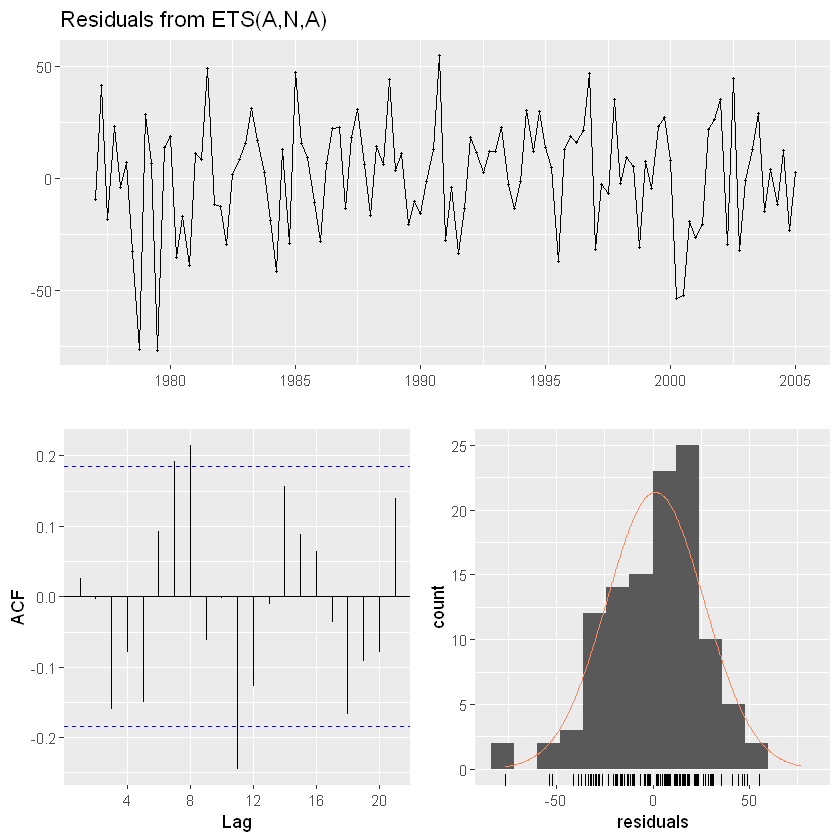

In [84]:
checkresiduals(ukets)

# 11. For this exercise use data set `visitors` , the monthly Australian short-term overseas visitors data, May 1985–April 2005.

>  a. Make a time plot of your data and describe the main features of the series.

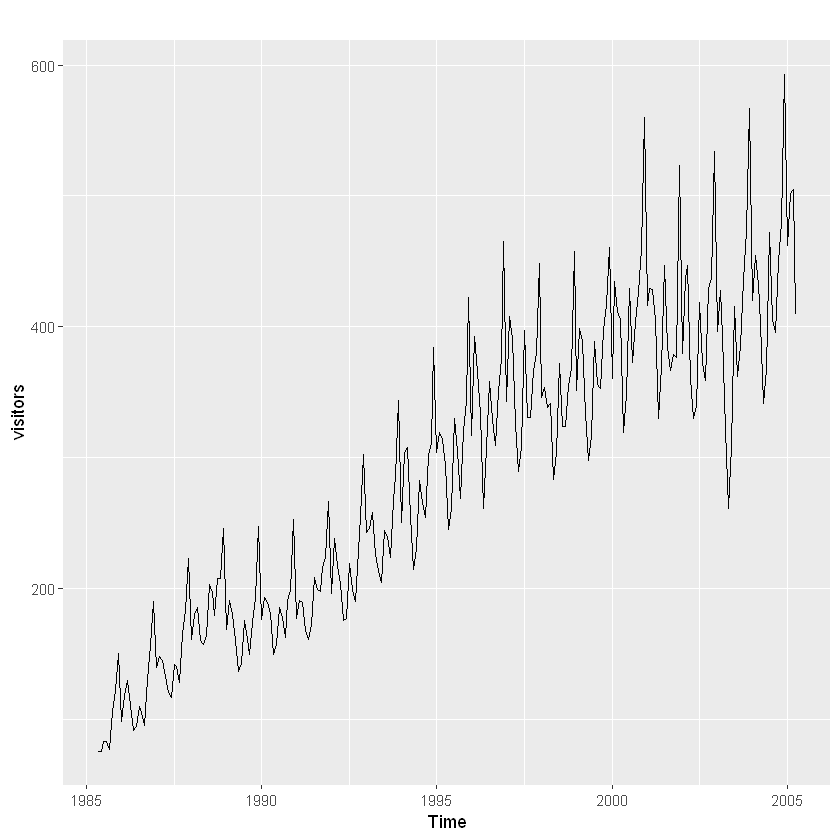

In [85]:
autoplot(visitors)

> b. Split your data into a training set and a test set comprising the last two
years of available data. Forecast the test set using Holt-Winters’
multiplicative method.

In [86]:
vtrain <- window(visitors, end=end(visitors)-c(2,0))
vtest <- window(visitors, start=end(visitors)-c(2,0))

In [87]:
vfcst <- hw(vtrain, h=24, seasonal = "multiplicative")

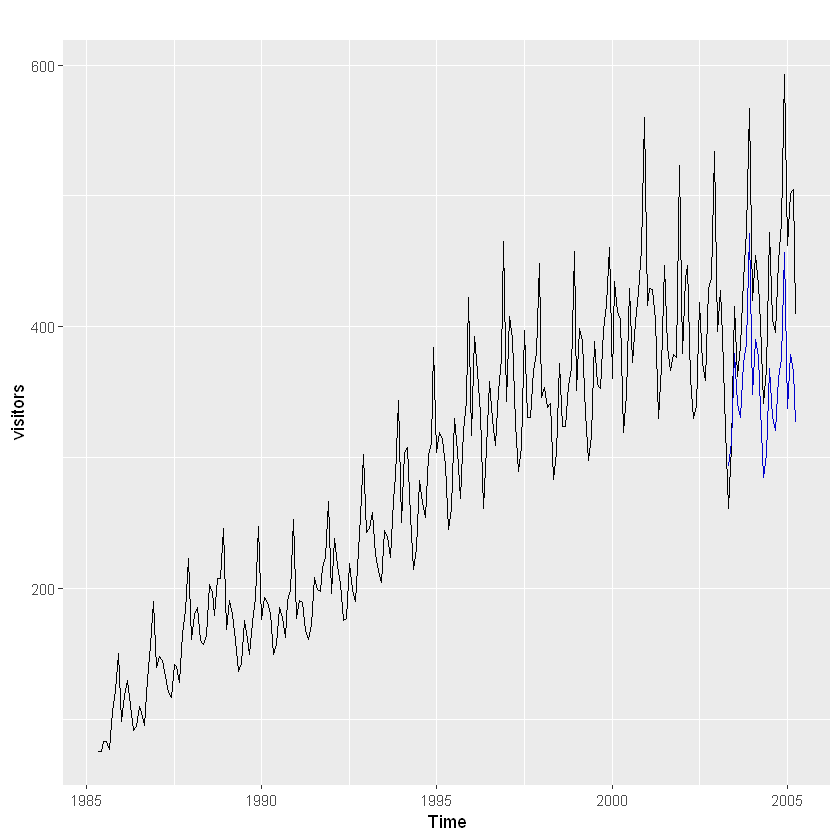

In [88]:
autoplot(visitors) +
autolayer(vfcst, PI=FALSE)

>c. Why is multiplicative seasonality necessary here?

>d. Forecast the two-year test set using each of the following methods:

>     i) an ETS model;

>     ii) an additive ETS model applied to a Box-Cox transformed series;

>     iii) a seasonal naïve method;

>     iv) an STL decomposition applied to the Box-Cox transformed data followed by an ETS model applied to the seasonally adjusted (transformed) data.

In [89]:
fets <- forecast(ets(vtrain), h=24)
fetsbc <- forecast(ets(vtrain, lambda = BoxCox.lambda(vtrain)), h=24)
fnaive <- snaive(vtrain, h=24)
fstlets <- stlf(vtrain, lambda = BoxCox.lambda(vtrain))

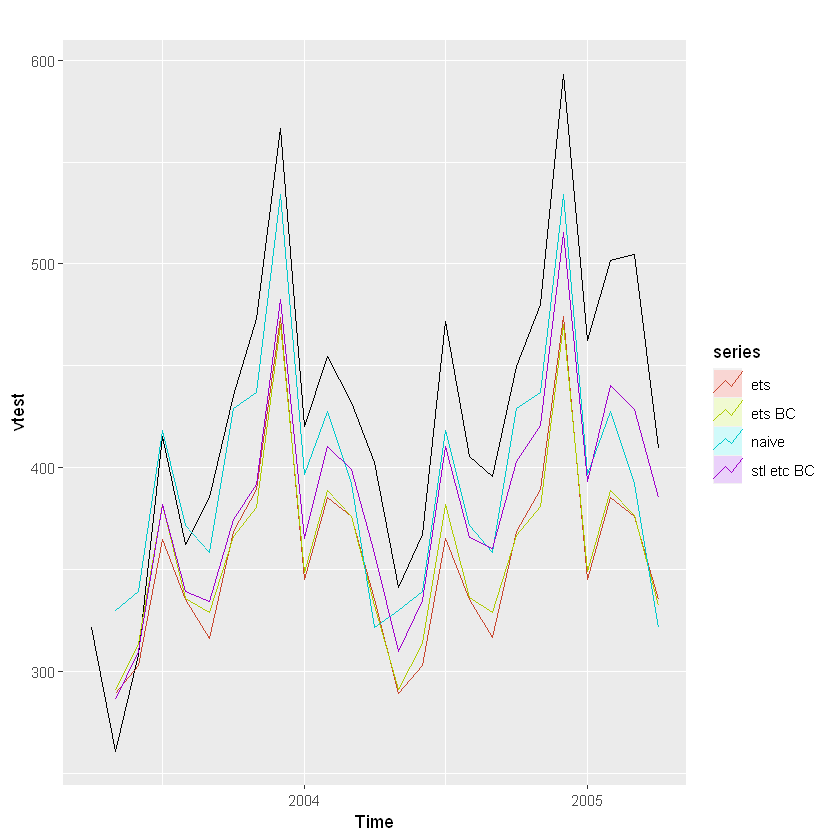

In [90]:
autoplot(vtest) + 
autolayer(fets, series="ets", PI=FALSE) + 
autolayer(fetsbc, series="ets BC", PI=FALSE) +
autolayer(fnaive, series="naive", PI=FALSE) + 
autolayer(fstlets, series="stl etc BC", PI=FALSE)

> e. Which method gives the best forecasts? Does it pass the residual tests?

In [91]:
sum(sqrt((vtest - fets$mean)^2)) / length(vtest)
sum(sqrt((vtest - fetsbc$mean)^2)) / length(vtest)
sum(sqrt((vtest - fnaive$mean)^2)) / length(vtest)
sum(sqrt((vtest - fstlets$mean)^2)) / length(vtest)

[1] 71.57073

[1] 69.51926

[1] 40.556

[1] 46.04779


	Ljung-Box test

data:  Residuals from Seasonal naive method
Q* = 295.02, df = 24, p-value < 2.2e-16

Model df: 0.   Total lags used: 24



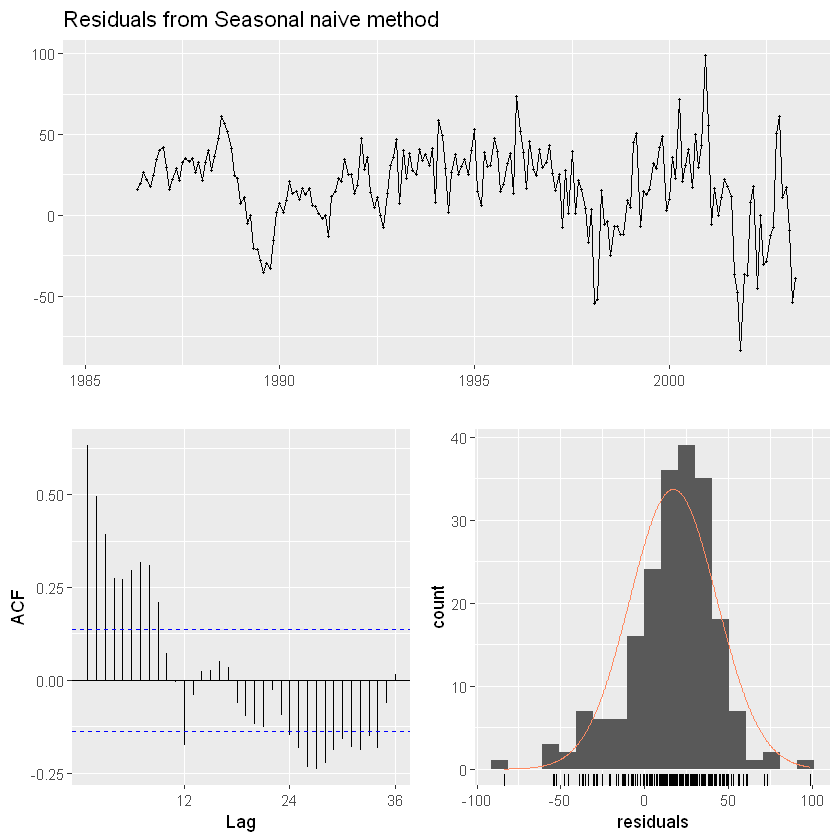

In [92]:
checkresiduals(fnaive)

> f. Compare the same four methods using time series cross-validation with the `tsCV` function instead of using a training and test set. Do you come to the same conclusions?

In [93]:
fun1 <- function(y, h){
    forecast(ets(y), h=h)
}
fun2 <- function(y, h){
    forecast(ets(y, lambda=BoxCox.lambda(y)), h=h)
}

In [96]:
e1 <- tsCV(visitors, fun1)

In [97]:
e2 <- tsCV(visitors, fun2)

In [98]:
e3 <- tsCV(visitors, snaive)

In [99]:
e4 <- tsCV(visitors, stlf, lambda=BoxCox.lambda(visitors))

In [102]:
e <- matrix(NA, ncol=4, nrow=length(visitors))

In [103]:
e[, 1] <- e1
e[, 2] <- e2
e[, 3] <- e3
e[, 4] <- e4

In [104]:
colMeans(e^2, na.rm = T)

[1]  343.3552  355.8652 1074.9707  282.5873

# 12.

The `fets()` function below returns ETS forecasts.

```{r}
fets <- function(y, h) {
  forecast(ets(y), h = h)
}
```

> a. Apply `tsCV()` for a forecast horizon of $h=4$, for both ETS and seasonal naïve methods to the `qcement` data, (Hint: use the newly created `fets()` and the existing `snaive()` functions as your forecast function arguments.)

In [105]:
fets <- function(y, h) {
  forecast(ets(y), h = h)
}

In [106]:
e1 <- tsCV(qcement, fets, h=4)

In [107]:
e2 <- tsCV(qcement, snaive, h=4)

In [108]:
colMeans(e1^2, na.rm = T)
colMeans(e2^2, na.rm = T)

h=1         h=2         h=3         h=4 
0.006959511 0.010592277 0.014117721 0.018451074

h=1        h=2        h=3        h=4 
0.01779243 0.01782813 0.01796352 0.01810650

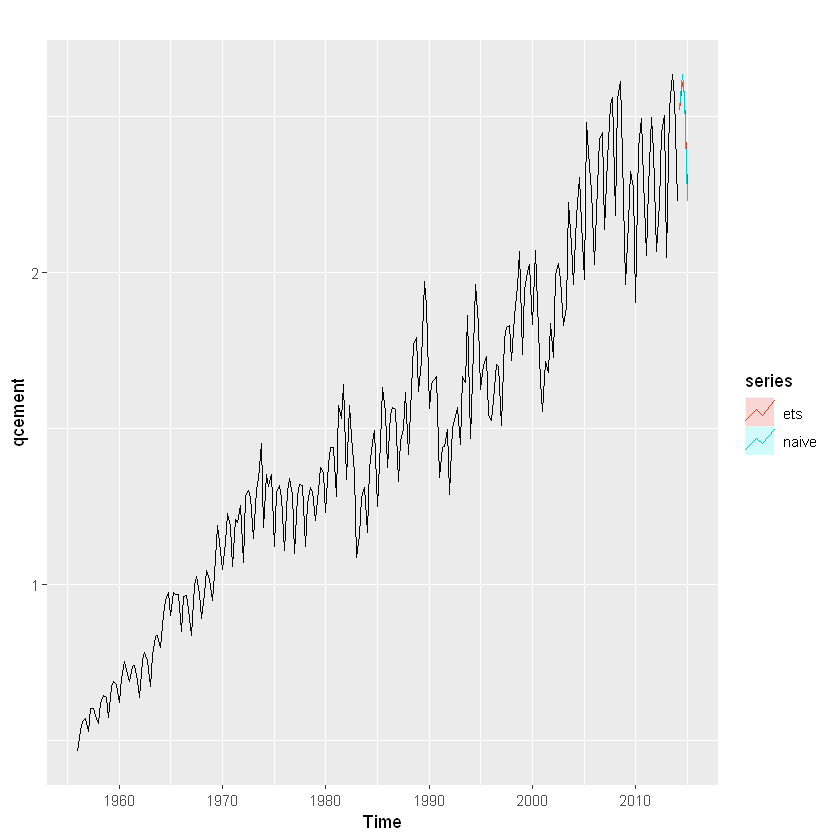

In [109]:
autoplot(qcement) + 
autolayer(fets(qcement, h=4), series="ets", PI=FALSE) + 
autolayer(snaive(qcement, h=4), series="naive", PI=FALSE)

# 13. Compare `ets`, `snaive` and `stlf` on the following six time series. For `stlf`, you might need to use a Box-Cox transformation. Use a test set of three years to decide what gives the best forecasts.        `ausbeer`, `bricksq`, `dole`, `a10`, `h02`, `usmelec`.

In [121]:
train <- window(ausbeer, end=end(ausbeer)-c(3,1))
test <- window(ausbeer, start=end(ausbeer)-c(3,0))
fc1 <- forecast(ets(train), h=13)
fc2 <- snaive(train, h=13)
fc3 <- stlf(train, lambda=BoxCox.lambda(train), h=13)

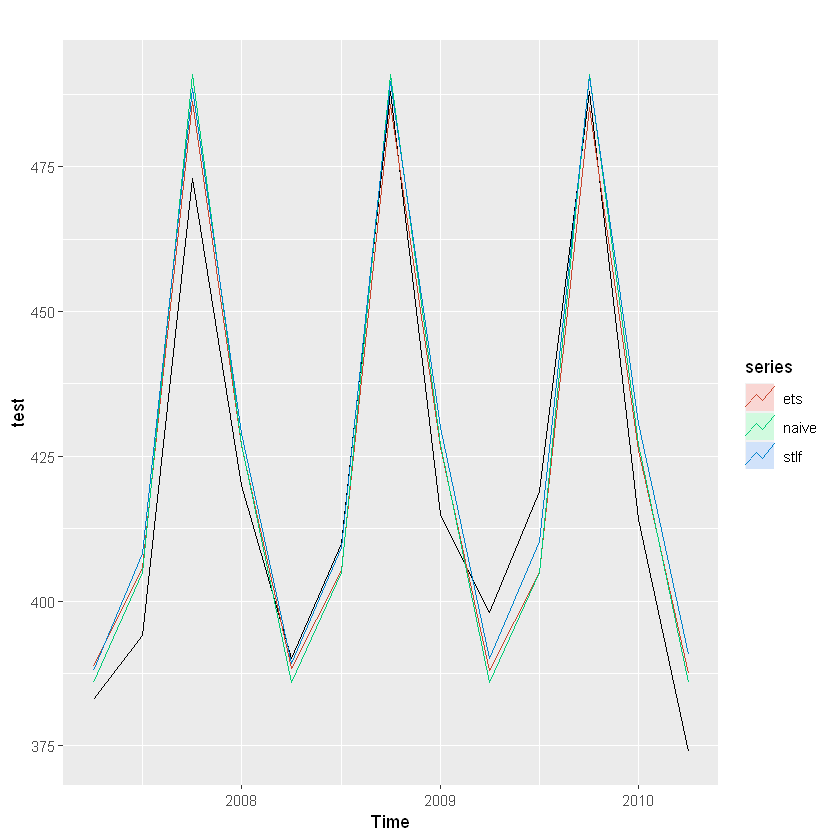

In [122]:
autoplot(test) + 
autolayer(fc1, series="ets", PI=FALSE) + 
autolayer(fc2, series="naive", PI=FALSE) +
autolayer(fc3, series="stlf", PI=FALSE)

In [123]:
accuracy(fc1, test)
accuracy(fc2, test)
accuracy(fc3, test)

,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1,Theil's U
Training set,-0.3277264,15.814416,12.011993,-0.05972334,2.871560,0.7556841,-0.1953342,NA
Test set,-3.0004013,9.565905,8.477236,-0.74556768,2.054088,0.5333097,0.3932191,0.1892583


,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1,Theil's U
Training set,3.368159,19.71778,15.89552,0.9127974,3.786236,1.0000000,-0.0002469795,NA
Test set,-3.615385,10.22441,9.00000,-0.8396570,2.162967,0.5661972,0.3517322372,0.2049314


,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1,Theil's U
Training set,0.6182399,13.6352,10.479361,0.1464515,2.510741,0.6592650,-0.1620239,NA
Test set,-6.0188687,10.6846,8.827108,-1.4519045,2.140312,0.5553204,0.3225159,0.2081258


In [125]:
bricksq

ERROR while rich displaying an object: Error in repr_matrix_generic(obj, "\n%s%s\n", sprintf("|%%s\n|%s|\n", : formal argument "cols" matched by multiple actual arguments

Traceback:
1. FUN(X[[i]], ...)
2. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
3. tryCatchList(expr, classes, parentenv, handlers)
4. tryCatchOne(expr, names, parentenv, handlers[[1L]])
5. doTryCatch(return(expr), name, parentenv, handler)
6. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = erro

,Qtr1,Qtr2,Qtr3,Qtr4
1956,189,204,208,197
1957,187,214,227,223
1958,199,229,249,234
1959,208,253,267,255
1960,242,268,290,277
1961,241,253,265,236
1962,229,265,275,258
1963,231,263,308,313
1964,293,328,349,340
1965,309,349,366,340


In [126]:
train <- window(bricksq, end=end(bricksq)-c(3,1))
test <- window(bricksq, start=end(bricksq)-c(3,0))
fc1 <- forecast(ets(train), h=13)
fc2 <- snaive(train, h=13)
fc3 <- stlf(train, lambda=BoxCox.lambda(train), h=13)

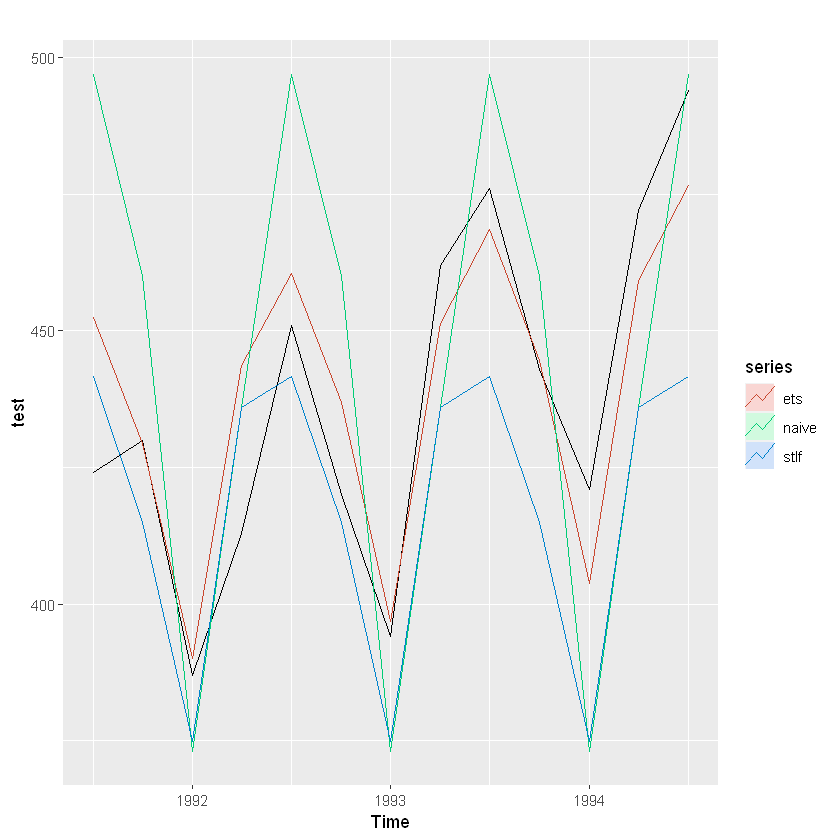

In [127]:
autoplot(test) + 
autolayer(fc1, series="ets", PI=FALSE) + 
autolayer(fc2, series="naive", PI=FALSE) +
autolayer(fc3, series="stlf", PI=FALSE)

In [128]:
accuracy(fc1, test)
accuracy(fc2, test)
accuracy(fc3, test)

,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1,Theil's U
Training set,-0.3488635,21.78068,15.44195,-0.1147142,3.800434,0.4228153,0.1788342,NA
Test set,-2.0223864,15.37817,12.23429,-0.5894459,2.803553,0.3349866,0.3270557,0.3889101


,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1,Theil's U
Training set,7.014493,50.05229,36.52174,1.565362,8.940406,1.0000000,0.8044755,NA
Test set,-8.307692,35.22019,30.61538,-1.902989,7.072799,0.8382784,0.2844705,0.8266998


,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1,Theil's U
Training set,1.400714,21.41328,15.39837,0.3616624,3.731307,0.4216221,0.1883923,NA
Test set,18.732439,28.44946,24.97868,4.1172636,5.612660,0.6839399,0.4221968,0.7767417


In [129]:
dole

ERROR while rich displaying an object: Error in repr_matrix_generic(obj, "\n%s%s\n", sprintf("|%%s\n|%s|\n", : formal argument "cols" matched by multiple actual arguments

Traceback:
1. FUN(X[[i]], ...)
2. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
3. tryCatchList(expr, classes, parentenv, handlers)
4. tryCatchOne(expr, names, parentenv, handlers[[1L]])
5. doTryCatch(return(expr), name, parentenv, handler)
6. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = erro

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
1956,4742,6128,6494,5379,6011,7003,9164,10333,9614,9545,10096,13277
1957,15711,13135,13077,15453,15995,18071,20291,20175,18975,17928,19782,26055
1958,29856,26879,24485,27745,27282,29418,29908,29278,26002,23826,22302,27565
1959,31486,28207,27669,27559,27924,27528,27410,24887,21904,19598,19037,22469
1960,23781,20020,18177,17732,16765,16310,14897,12940,11465,10364,11738,17633
1961,19257,20941,29718,35025,45110,57154,61499,62090,59561,48531,47541,56756
1962,56755,49740,45870,49136,47256,46324,45453,42333,36851,33952,33392,43153
1963,46178,40482,36394,37142,36424,38188,37174,31869,26575,21758,20978,29555
1964,28649,24226,21955,19937,18287,18129,17072,14924,12491,11160,10658,15451
1965,15831,13698,12111,12690,12585,12855,12137,10977,9993,9614,10459,20509


In [137]:
train <- window(dole, end=end(dole)-c(3,1))
test <- window(dole, start=end(dole)-c(3,0))
fc1 <- forecast(ets(train), h=36)
fc2 <- snaive(train, h=36)
fc3 <- stlf(train, lambda=BoxCox.lambda(train), h=36)

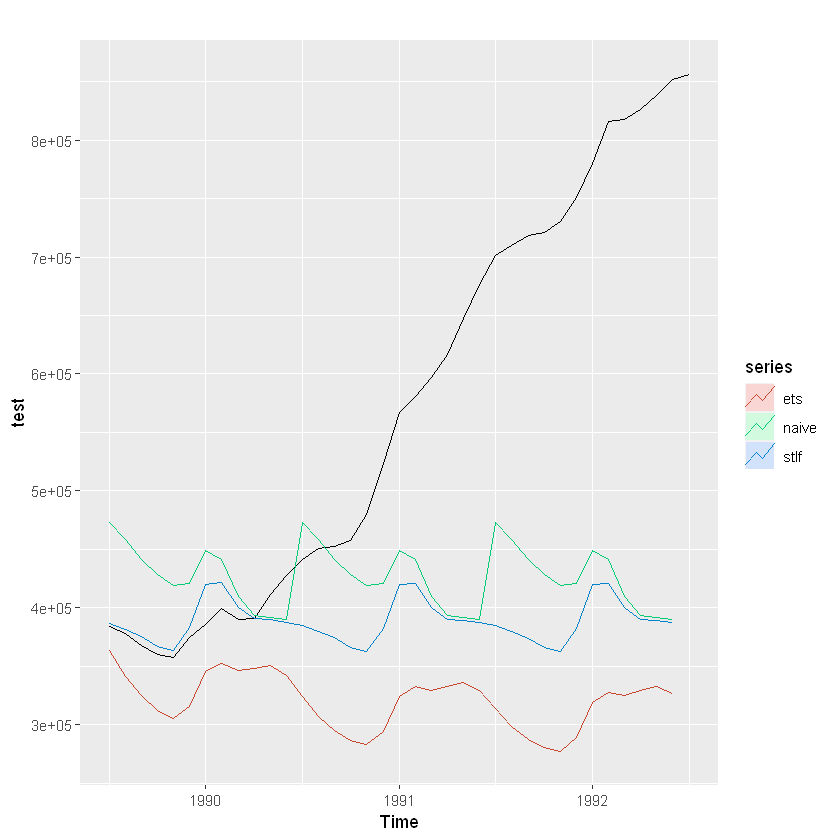

In [138]:
autoplot(test) + 
autolayer(fc1, series="ets", PI=FALSE) + 
autolayer(fc2, series="naive", PI=FALSE) +
autolayer(fc3, series="stlf", PI=FALSE)

In [139]:
accuracy(fc1, test)
accuracy(fc2, test)
accuracy(fc3, test)

,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1,Theil's U
Training set,-43.97203,16514.08,9559.249,0.5003715,6.235696,0.3051564,0.5075433,NA
Test set,245990.37348,302478.73,245990.373,37.7926695,37.792670,7.8526600,0.9366090,12.61801


,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1,Theil's U
Training set,12867.03,56276.27,31325.74,3.418356,27.74820,1.000000,0.9782284,NA
Test set,139826.81,224940.16,172348.47,17.407268,25.98169,5.501817,0.9179536,8.981789


,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1,Theil's U
Training set,164.504,6161.745,3538.65,0.1792235,3.731988,0.112963,-0.07099662,NA
Test set,177799.662,243916.217,183456.09,25.1736039,26.651081,5.856401,0.93667203,9.765639


In [140]:
a10

ERROR while rich displaying an object: Error in repr_matrix_generic(obj, "\n%s%s\n", sprintf("|%%s\n|%s|\n", : formal argument "cols" matched by multiple actual arguments

Traceback:
1. FUN(X[[i]], ...)
2. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
3. tryCatchList(expr, classes, parentenv, handlers)
4. tryCatchOne(expr, names, parentenv, handlers[[1L]])
5. doTryCatch(return(expr), name, parentenv, handler)
6. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = erro

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
1991,,,,,,,3.526591,3.180891,3.252221,3.611003,3.565869,4.306371
1992,5.088335,2.814520,2.985811,3.204780,3.127578,3.270523,3.737851,3.558776,3.777202,3.924490,4.386531,5.810549
1993,6.192068,3.450857,3.772307,3.734303,3.905399,4.049687,4.315566,4.562185,4.608662,4.667851,5.093841,7.179962
1994,6.731473,3.841278,4.394076,4.075341,4.540645,4.645615,4.752607,5.350605,5.204455,5.301651,5.773742,6.204593
1995,6.749484,4.216067,4.949349,4.823045,5.194754,5.170787,5.256742,5.855277,5.490729,6.115293,6.088473,7.416598
1996,8.329452,5.069796,5.262557,5.597126,6.110296,5.689161,6.486849,6.300569,6.467476,6.828629,6.649078,8.606937
1997,8.524471,5.277918,5.714303,6.214529,6.411929,6.667716,7.050831,6.704919,7.250988,7.819733,7.398101,10.096233
1998,8.798513,5.918261,6.534493,6.675736,7.064201,7.383381,7.813496,7.431892,8.275117,8.260441,8.596156,10.558939
1999,10.391416,6.421535,8.062619,7.297739,7.936916,8.165323,8.717420,9.070964,9.177113,9.251887,9.933136,11.532974
2000,12.511462,7.457199,8.591191,8.474000,9.386803,9.560399,10.834295,10.643751,9.908162,11.710041,11.340151,12.079132


,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1,Theil's U
Training set,0.04453347,0.4871696,0.3514114,0.2302407,3.978799,0.359998,-0.07201835,NA
Test set,1.94820204,2.8252641,2.2379827,8.5915374,10.409452,2.292667,0.30367534,0.7715502


,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1,Theil's U
Training set,0.9528301,1.173254,0.9761483,10.86243,11.15917,1.000000,0.3820970,NA
Test set,4.3576261,5.218219,4.3701650,20.09919,20.18728,4.476948,0.6762667,1.410315


,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1,Theil's U
Training set,0.005501358,0.4156385,0.3076362,-0.1384512,3.601905,0.3151531,-0.1345679,NA
Test set,1.383049872,2.2597694,1.8653501,5.6620330,8.769762,1.9109290,0.2170432,0.6122448


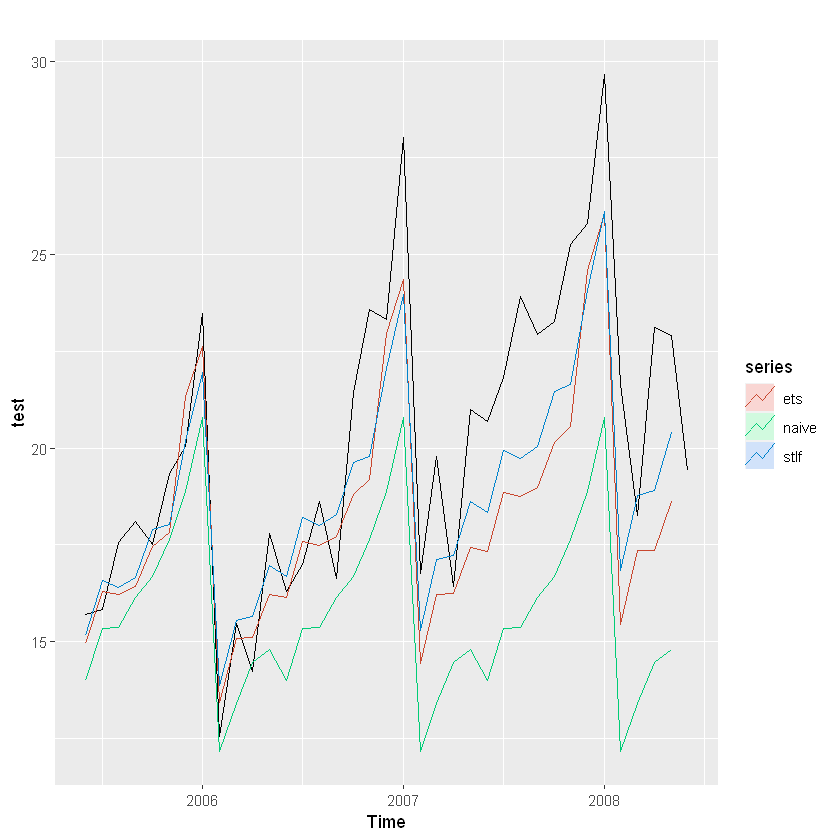

In [142]:
train <- window(a10, end=end(a10)-c(3,1))
test <- window(a10, start=end(a10)-c(3,0))
fc1 <- forecast(ets(train), h=36)
fc2 <- snaive(train, h=36)
fc3 <- stlf(train, lambda=BoxCox.lambda(train), h=36)
autoplot(test) + 
autolayer(fc1, series="ets", PI=FALSE) + 
autolayer(fc2, series="naive", PI=FALSE) +
autolayer(fc3, series="stlf", PI=FALSE)
accuracy(fc1, test)
accuracy(fc2, test)
accuracy(fc3, test)

In [144]:
h02

ERROR while rich displaying an object: Error in repr_matrix_generic(obj, "\n%s%s\n", sprintf("|%%s\n|%s|\n", : formal argument "cols" matched by multiple actual arguments

Traceback:
1. FUN(X[[i]], ...)
2. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
3. tryCatchList(expr, classes, parentenv, handlers)
4. tryCatchOne(expr, names, parentenv, handlers[[1L]])
5. doTryCatch(return(expr), name, parentenv, handler)
6. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = erro

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
1991,,,,,,,0.4297950,0.4009060,0.4321590,0.4925430,0.5023690,0.6026520
1992,0.6601190,0.3362200,0.3513480,0.3798080,0.3618010,0.4105340,0.4833887,0.4754634,0.5347610,0.5686061,0.5952233,0.7712578
1993,0.7515028,0.3875543,0.4272832,0.4138902,0.4288588,0.4701264,0.5092097,0.5584430,0.6015141,0.6329471,0.6996054,0.9630805
1994,0.8193253,0.4376698,0.5061213,0.4704912,0.5106963,0.5405138,0.5581189,0.6728521,0.6858974,0.6896920,0.7413036,0.8133076
1995,0.8031126,0.4752582,0.5525723,0.5271078,0.5612498,0.5889776,0.6231336,0.7408372,0.7253718,0.8158030,0.8140095,0.9266531
1996,0.9372759,0.5287616,0.5593399,0.5778717,0.6149274,0.5941888,0.7077584,0.7195020,0.7443237,0.8048551,0.7885423,0.9710894
1997,0.8468335,0.4638225,0.4852732,0.5280586,0.5623365,0.5885704,0.6694804,0.6779937,0.7629955,0.7997237,0.7705219,0.9943893
1998,0.8005444,0.4905572,0.5244080,0.5366495,0.5520905,0.6033656,0.6812454,0.6780753,0.7948926,0.7846239,0.8130087,0.9777323
1999,0.8930815,0.5126960,0.6529959,0.5739764,0.6392384,0.7038719,0.7706482,0.8461859,0.8927289,0.8978999,0.9472807,1.0507073
2000,0.9696557,0.5732915,0.6185068,0.6189957,0.6652092,0.7265201,0.8558649,0.8659843,0.8252488,0.9554210,0.9385960,1.0130244


,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1,Theil's U
Training set,-0.005839258,0.04721347,0.03485033,-0.9933135,4.659098,0.5858134,0.1342509,NA
Test set,0.018880781,0.07293169,0.06130399,1.1734152,6.834075,1.0304839,-0.1304120,0.4297391


,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1,Theil's U
Training set,0.03915094,0.07144133,0.05949049,5.265019,8.197994,1.000000,0.39326999,NA
Test set,-0.01378079,0.08480448,0.07059648,-1.163027,7.739285,1.186685,0.05515531,0.5139977


,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1,Theil's U
Training set,0.001484422,0.03917380,0.02950828,-0.09917989,4.006421,0.4960167,-0.1400721,NA
Test set,0.060479825,0.08988643,0.07333716,5.67983815,7.692105,1.2327543,-0.1474802,0.5108123


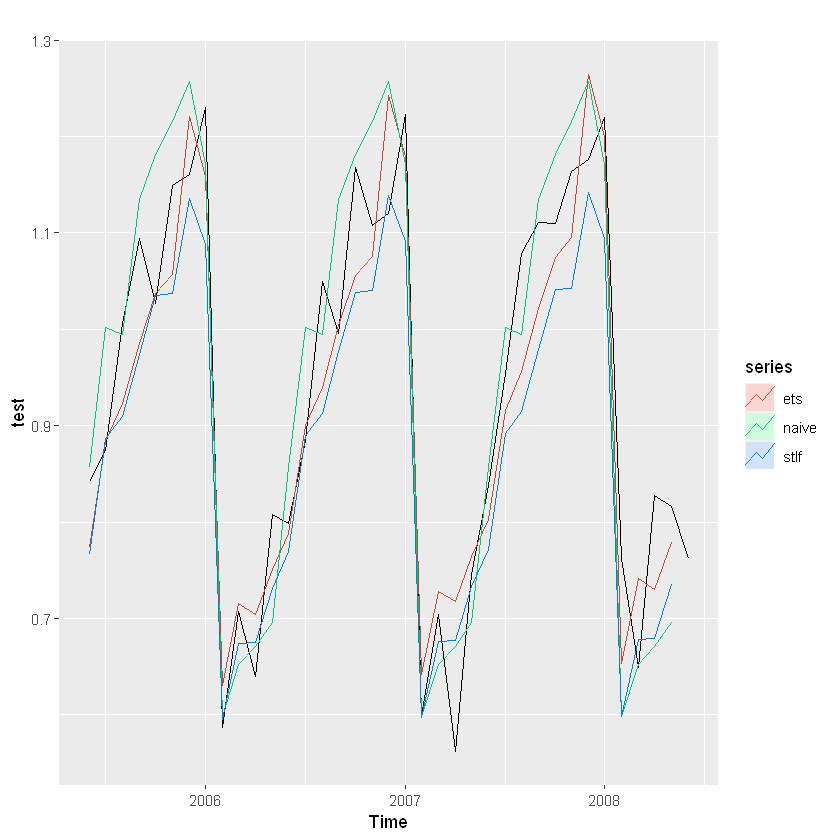

In [145]:
train <- window(h02, end=end(h02)-c(3,1))
test <- window(h02, start=end(h02)-c(3,0))
fc1 <- forecast(ets(train), h=36)
fc2 <- snaive(train, h=36)
fc3 <- stlf(train, lambda=BoxCox.lambda(train), h=36)
autoplot(test) + 
autolayer(fc1, series="ets", PI=FALSE) + 
autolayer(fc2, series="naive", PI=FALSE) +
autolayer(fc3, series="stlf", PI=FALSE)
accuracy(fc1, test)
accuracy(fc2, test)
accuracy(fc3, test)

In [148]:
usmelec

ERROR while rich displaying an object: Error in repr_matrix_generic(obj, "\n%s%s\n", sprintf("|%%s\n|%s|\n", : formal argument "cols" matched by multiple actual arguments

Traceback:
1. FUN(X[[i]], ...)
2. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
3. tryCatchList(expr, classes, parentenv, handlers)
4. tryCatchOne(expr, names, parentenv, handlers[[1L]])
5. doTryCatch(return(expr), name, parentenv, handler)
6. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = erro

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
1973,160.218,143.539,148.158,139.589,147.395,161.244,173.733,177.365,156.875,154.197,148.138,153.605
1974,157.555,142.748,150.342,142.312,153.813,156.440,178.247,174.119,152.467,152.196,150.071,160.009
1975,164.623,147.349,155.760,146.495,153.531,162.717,177.057,179.931,155.441,155.188,153.035,169.628
1976,178.609,156.966,164.467,153.467,157.664,173.674,186.691,186.639,165.237,164.009,169.346,184.144
1977,196.665,162.949,169.437,157.117,169.596,181.031,199.168,196.363,176.498,166.645,167.388,184.589
1978,198.108,173.746,173.461,160.013,175.549,188.585,202.947,206.659,185.802,176.013,176.389,192.105
1979,209.987,186.587,183.154,170.260,178.409,186.976,202.522,205.101,180.975,179.953,177.770,188.970
1980,200.296,188.961,187.745,169.017,176.066,189.748,217.058,215.629,191.698,178.761,178.771,195.849
1981,206.758,179.860,185.834,172.841,178.139,203.021,220.655,210.639,187.051,181.558,175.792,195.826
1982,209.694,180.546,187.968,172.877,177.480,186.447,210.865,205.892,180.875,173.172,173.599,184.958


,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1,Theil's U
Training set,0.4949346,7.298956,5.450133,0.1444447,2.133156,0.6086471,0.04427954,NA
Test set,4.1089753,13.617773,10.387622,0.8909161,2.870954,1.1600444,0.58075337,0.3882407


,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1,Theil's U
Training set,4.868522,11.52062,8.954503,1.988132,3.502571,1.000000,0.4839319,NA
Test set,8.355472,17.78925,14.060694,2.178254,3.912180,1.570237,0.5411975,0.5084651


,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1,Theil's U
Training set,-0.1444685,6.298561,4.733474,-0.05361971,1.838786,0.5286137,0.08417934,NA
Test set,-11.7022560,18.308198,15.717834,-3.67771229,4.716249,1.7552994,0.67082880,0.5795498


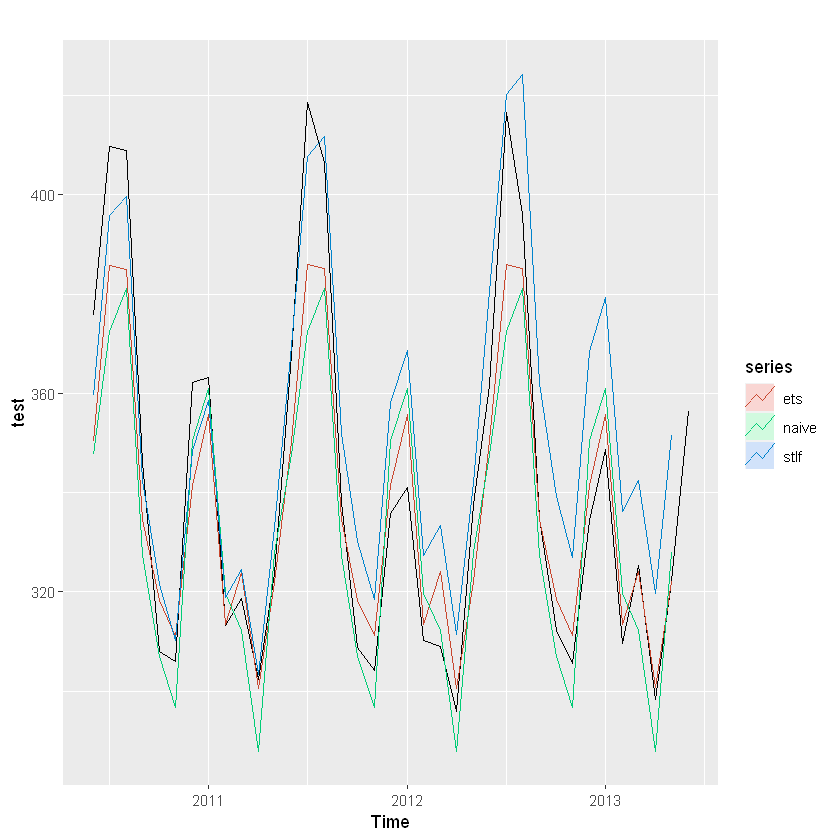

In [149]:
train <- window(usmelec, end=end(usmelec)-c(3,1))
test <- window(usmelec, start=end(usmelec)-c(3,0))
fc1 <- forecast(ets(train), h=36)
fc2 <- snaive(train, h=36)
fc3 <- stlf(train, lambda=BoxCox.lambda(train), h=36)
autoplot(test) + 
autolayer(fc1, series="ets", PI=FALSE) + 
autolayer(fc2, series="naive", PI=FALSE) +
autolayer(fc3, series="stlf", PI=FALSE)
accuracy(fc1, test)
accuracy(fc2, test)
accuracy(fc3, test)

# 15. Show that the point forecasts from an ETS(M,A,M) model are the same as those obtained using multiplicative Holt-Winters' method.


$$
  \hat{y}_{t+h|t} = (\ell_t + hb_t)s_{t-m+h_m^+}
$$

\begin{align*}
  y_t    & = (\ell_{t-1}+b_{t-1})s_{t-m}(1+\varepsilon_t) \\
  \ell_t & = (\ell_{t-1}+b_{t-1})(1+\alpha\varepsilon_t) \\
  b_t    & = b_{t-1} + \beta(\ell_{t-1}+b_{t-1})\varepsilon_t \\
  s_t    & = s_{t-m} (1+\gamma\varepsilon_t)
\end{align*}

$$
  y_{T+h} = (\ell_{T+h-1}+b_{T+h-1})s_{T+h-m}(1+\varepsilon_{T+h-m})
$$


$$
  \hat{y}_{T+h} = (\ell_{T+h-2}+2b_{T+h-2})s_{T+h-m}
$$


$$
  \hat{y}_{T+h} = (\ell_{T}+hb_{T})s_{T+h-m}
$$


$$
  \hat{y}_{T+h|T} = (\ell_{T}+hb_{T})s_{T+h_m^+-m}
$$


# 16.
>Show that the forecast variance for an ETS(A,N,N) model is given by
$$
\sigma^2\left[1+\alpha^2(h-1)\right].
$$


  \begin{align*}
    y_t      & = \ell_{t-1} + \varepsilon_{t} \\
    \ell_{t} & = \ell_{t-1} + \alpha\varepsilon_{t},
  \end{align*}
 $\varepsilon_t \sim \text{N}(0,\sigma^2)$, 
$$
 \hat{y}_{T+h|T} = \ell_T.
$$

  \begin{align*}
     y_{T+h} & = \ell_{T+h-1} + \varepsilon_{T+h} \\
             & = \ell_{T+h-2} + \alpha \varepsilon_{T+h-1} +  \varepsilon_{T+h} \\
             & = \ell_{T+h-3} + \alpha \varepsilon_{T+h-2}  + \alpha \varepsilon_{T+h-1} +  \varepsilon_{T+h} \\
             & \dots \\
             & = \ell_{T} + \alpha \sum_{j=1}^{h-1} \varepsilon_{T+h-j} +  \varepsilon_{T+h}.
  \end{align*}


  \begin{align*}
    \text{Var}(y_{T+h} | y_1,\dots,y_T) & = \alpha^2 \sum_{j=1}^{h-1} \sigma^2 +  \sigma^2 \\
                                        & =  \sigma^2\left[ 1 + \alpha^2 (h-1)\right ].
  \end{align*}

# 17.Write down the 95\% prediction intervals for an ETS(A,N,N) model as a function of $\ell_T$, $\alpha$, $h$ and $\sigma$, assuming Gaussian errors.


$$
 \ell_T \pm 1.96 \sigma \sqrt{ 1 + \alpha^2 (h-1)}
$$
